In [1]:
import math
import numpy as np

In [2]:
import ellipsefns
#getfocus, getsemiminor, theoreticalx, theoreticaly

In [3]:
import initdatuneq

In [4]:
delta=0.005 #with dtmin=0.001, accuracy of 1e-6 appears to be too much to ask. try 0.05
rad0=50
ecc0=0.0 #set ecc = 0 for circle, ecc < 1 for ellepse, = 1 for parabola, >1 for hyperbola
theta0= 0. #math.pi/6. #math.pi/6.
mass0_1=1.0
mass0_2=1.0
initdatequneq=initdatuneq.InitialDataEqualMassConic(rad0,ecc0,theta0,mass0_1,mass0_2)
print(initdatequneq)

angle 0.0
0.0
(array([3.14159265, 0.        ]), 0.0, 50, 0.0, array([1., 1.]))


In [5]:
import getxyuvtwouneq_apper #unequal mass version

In [6]:
useperihelion=True

In [7]:
xyuvaequneq=getxyuvtwouneq_apper.getxyuvequneq(initdatequneq,useperihelion)
print(xyuvaequneq)
masses,xvec,avec=xyuvaequneq

initdat 50 [3.14159265 0.        ] 0.0 [-1.  1.] [1.2246468e-16 0.0000000e+00]
coordsep 50
pi
zero
[-50.  50.]
[0. 0.]
circle
r0 100.0
(array([1., 1.]), array([[-25. ,   0. ,   0. ,  -0. ,  -0.1,   0. ],
       [ 25. ,   0. ,   0. ,  -0. ,   0.1,   0. ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [8]:
import RK4implicit

In [9]:
def RK4implicit(h,t,xvec,f): #not a finite difference so no step in y
    k1= h*f(t,xvec)
    k2=h*f(t+h/2, xvec+k1/2)
    k3=h*f(t+h/2,xvec+k2/2)
    k4=h*f(t+h,xvec+k3)
    return t+h, xvec+1/6.*(k1+2.*k2+2.*k3+k4)

In [10]:
import OrbitDiffEqAdaptive

In [11]:
masses, xvec,avec=xyuvaequneq
ODEeq= OrbitDiffEqAdaptive.OrbitDiffEqAdaptive(masses,xvec,avec,0.0, delta)
ODEeq.print2D()
ODEeq.print2D()

[1. 1.] [[-25.    0.    0.   -0.   -0.1   0. ]
 [ 25.    0.    0.   -0.    0.1   0. ]] 0.0
[1. 1.] [[-25.    0.    0.   -0.   -0.1   0. ]
 [ 25.    0.    0.   -0.    0.1   0. ]] 0.0


In [12]:
print(xyuvaequneq)

(array([1., 1.]), array([[-25. ,   0. ,   0. ,  -0. ,  -0.1,   0. ],
       [ 25. ,   0. ,   0. ,  -0. ,   0.1,   0. ]]), array([[ 0.0004, -0.    ,  0.    ],
       [-0.0004, -0.    ,  0.    ]]))


In [13]:
import timestepAdaptive

In [14]:
import parabfns

In [15]:
import hyperbfns

In [16]:
numsteps=10000 #50000

#numsteps=6000*10

dt=.01
dtmax=1
dtmin = 0.001
outputevery=1
nptimes, npstar1x, npstar2x, npstar1a, npstar2a,nperr,npdt= timestepAdaptive.timestepAdaptive(numsteps,dt,dtmax,dtmin,xyuvaequneq,outputevery,delta)

0.01
[-5.99999979e-08  9.99999998e-04  0.00000000e+00]
[3.59999974e-15 9.99999996e-07 0.00000000e+00]
9.999999998666662e-07
0.000999999999933333
150.00000001000004 False
0.031496719604750194
[-7.21212878e-07  3.14967188e-03  0.00000000e+00]
[5.20148015e-13 9.92043293e-06 0.00000000e+00]
9.92043344548055e-06
0.003149671958391945
47.62400719234965 False
0.0744670787641667
[-4.56326298e-06  7.44670645e-03  0.00000000e+00]
[2.08233691e-11 5.54534370e-05 0.00000000e+00]
5.5453457786674344e-05
0.007446707848886939
20.143129426303535 False
0.14198372395438297
[-1.86816099e-05  1.41983599e-02  0.00000000e+00]
[3.49002547e-10 2.01593424e-04 0.00000000e+00]
0.00020159377326085974
0.014198372204617674
10.564591337534887 False
0.23037972083041622
[-5.56151847e-05  2.30379041e-02  0.00000000e+00]
[3.09304877e-09 5.30745027e-04 0.00000000e+00]
0.0005307481201396606
0.023037971267879917
6.51098997632372 False
0.33120624259547693
[-0.00013051  0.03312036  0.        ]
[1.70336459e-08 1.09695856e-03 0.0

0.008099991251304275
0.08999995139612174
1.6666675667389723 False
0.9
[-0.03786517  0.08164692  0.        ]
[0.00143377 0.00666622 0.        ]
0.008099991251304246
0.08999995139612157
1.6666675667389754 False
0.9
[-0.03815886  0.08151008  0.        ]
[0.0014561  0.00664389 0.        ]
0.00809999125130449
0.08999995139612293
1.6666675667389501 False
0.9
[-0.03845205  0.08137218  0.        ]
[0.00147856 0.00662143 0.        ]
0.008099991251304482
0.08999995139612288
1.6666675667389512 False
0.9
[-0.03874474  0.08123322  0.        ]
[0.00150115 0.00659884 0.        ]
0.008099991251304771
0.08999995139612449
1.6666675667389215 False
0.9
[-0.03903692  0.08109322  0.        ]
[0.00152388 0.00657611 0.        ]
0.008099991251305061
0.0899999513961261
1.6666675667388915 False
0.9
[-0.03932861  0.08095216  0.        ]
[0.00154674 0.00655325 0.        ]
0.008099991251304893
0.08999995139612517
1.6666675667389088 False
0.9
[-0.03961978  0.08081005  0.        ]
[0.00156973 0.00653026 0.        ]
0

0.08999995139617976
1.6666675667378978 False
0.9
[-0.06814961  0.05878454  0.        ]
[0.00464437 0.00345562 0.        ]
0.008099991251315167
0.08999995139618225
1.6666675667378519 False
0.9
[-0.06836079  0.05853882  0.        ]
[0.0046732  0.00342679 0.        ]
0.008099991251315027
0.08999995139618147
1.666667566737866 False
0.9
[-0.06857109  0.05829234  0.        ]
[0.00470199 0.003398   0.        ]
0.008099991251315221
0.08999995139618255
1.666667566737846 False
0.9
[-0.06878049  0.05804511  0.        ]
[0.00473076 0.00336923 0.        ]
0.008099991251315344
0.08999995139618323
1.6666675667378335 False
0.9
[-0.06898901  0.05779713  0.        ]
[0.00475948 0.00334051 0.        ]
0.008099991251315653
0.08999995139618495
1.6666675667378017 False
0.9
[-0.06919663  0.05754839  0.        ]
[0.00478817 0.00331182 0.        ]
0.008099991251315442
0.08999995139618377
1.6666675667378235 False
0.9
[-0.06940336  0.05729891  0.        ]
[0.00481683 0.00328317 0.        ]
0.00809999125131567
0.

0.0899999513962715
1.666667566736199 False
0.9
[-0.08676443  0.02391496  0.        ]
[0.00752807 0.00057193 0.        ]
0.008099991251331456
0.08999995139627275
1.6666675667361759 False
0.9
[-0.08684996  0.02360245  0.        ]
[0.00754292 0.00055708 0.        ]
0.00809999125133148
0.08999995139627288
1.6666675667361734 False
0.9
[-0.08693437  0.02328964  0.        ]
[0.00755758 0.00054241 0.        ]
0.008099991251331684
0.08999995139627401
1.6666675667361526 False
0.9
[-0.08701764  0.02297653  0.        ]
[0.00757207 0.00052792 0.        ]
0.008099991251331956
0.08999995139627552
1.6666675667361246 False
0.9
[-0.0870998   0.02266311  0.        ]
[0.00758637 0.00051362 0.        ]
0.008099991251331902
0.08999995139627522
1.6666675667361301 False
0.9
[-0.08718082  0.02234941  0.        ]
[0.0076005 0.0004995 0.       ]
0.008099991251332058
0.08999995139627609
1.666667566736114 False
0.9
[-0.08726071  0.02203541  0.        ]
[0.00761443 0.00048556 0.        ]
0.008099991251332398
0.0899

0.9
[-0.08910112 -0.01268785  0.        ]
[0.00793901 0.00016098 0.        ]
0.008099991251348679
0.08999995139636842
1.6666675667344042 False
0.9
[-0.08905487 -0.01300853  0.        ]
[0.00793077 0.00016922 0.        ]
0.00809999125134894
0.08999995139636988
1.666667566734377 False
0.9
[-0.08900746 -0.01332904  0.        ]
[0.00792233 0.00017766 0.        ]
0.008099991251349152
0.08999995139637106
1.6666675667343553 False
0.9
[-0.0889589  -0.01364938  0.        ]
[0.00791369 0.00018631 0.        ]
0.00809999125134924
0.08999995139637154
1.6666675667343465 False
0.9
[-0.08890918 -0.01396954  0.        ]
[0.00790484 0.00019515 0.        ]
0.00809999125134941
0.08999995139637249
1.666667566734329 False
0.9
[-0.08885832 -0.01428952  0.        ]
[0.0078958  0.00020419 0.        ]
0.008099991251349614
0.08999995139637362
1.6666675667343078 False
0.9
[-0.0888063  -0.01460932  0.        ]
[0.00788656 0.00021343 0.        ]
0.008099991251349699
0.0899999513963741
1.6666675667342992 False
0.9
[

1.6666675667325483 False
0.9
[-0.07453094 -0.05044929  0.        ]
[0.00555486 0.00254513 0.        ]
0.008099991251366574
0.08999995139646784
1.666667566732563 False
0.9
[-0.07434884 -0.05071727  0.        ]
[0.00552775 0.00257224 0.        ]
0.008099991251366994
0.08999995139647017
1.66666756673252 False
0.9
[-0.07416577 -0.0509846   0.        ]
[0.00550056 0.00259943 0.        ]
0.008099991251367051
0.08999995139647049
1.666667566732514 False
0.9
[-0.07398175 -0.05125127  0.        ]
[0.0054733  0.00262669 0.        ]
0.008099991251367174
0.08999995139647118
1.666667566732501 False
0.9
[-0.07379676 -0.05151727  0.        ]
[0.00544596 0.00265403 0.        ]
0.008099991251367471
0.08999995139647282
1.6666675667324709 False
0.9
[-0.07361082 -0.0517826   0.        ]
[0.00541855 0.00268144 0.        ]
0.008099991251367367
0.08999995139647225
1.6666675667324813 False
0.9
[-0.07342393 -0.05204726  0.        ]
[0.00539107 0.00270892 0.        ]
0.008099991251367802
0.08999995139647467
1.66

0.9
[-0.04600554 -0.07735297  0.        ]
[0.00211651 0.00598348 0.        ]
0.008099991251380346
0.08999995139654436
1.666667566731146 False
0.9
[-0.04572677 -0.07751808  0.        ]
[0.00209094 0.00600905 0.        ]
0.008099991251380003
0.08999995139654245
1.6666675667311814 False
0.9
[-0.04544741 -0.0776822   0.        ]
[0.00206547 0.00603452 0.        ]
0.008099991251379774
0.08999995139654117
1.6666675667312052 False
0.9
[-0.04516746 -0.0778453   0.        ]
[0.0020401  0.00605989 0.        ]
0.008099991251380268
0.08999995139654392
1.6666675667311541 False
0.9
[-0.04488693 -0.0780074   0.        ]
[0.00201484 0.00608515 0.        ]
0.008099991251379881
0.08999995139654177
1.666667566731194 False
0.9
[-0.04460581 -0.07816849  0.        ]
[0.00198968 0.00611031 0.        ]
0.008099991251380174
0.0899999513965434
1.6666675667311637 False
0.9
[-0.04432412 -0.07832856  0.        ]
[0.00196463 0.00613536 0.        ]
0.008099991251380409
0.08999995139654471
1.6666675667311395 False
0.

0.08999995139657452
1.6666675667305875 False
0.9
[-0.01196587 -0.08920095  0.        ]
[0.00014318 0.00795681 0.        ]
0.008099991251385835
0.08999995139657485
1.6666675667305813 False
0.9
[-0.01164467 -0.08924345  0.        ]
[0.0001356  0.00796439 0.        ]
0.008099991251385812
0.08999995139657473
1.6666675667305837 False
0.9
[-0.01132331 -0.08928479  0.        ]
[0.00012822 0.00797177 0.        ]
0.008099991251385845
0.0899999513965749
1.6666675667305804 False
0.9
[-0.01100182 -0.08932498  0.        ]
[0.00012104 0.00797895 0.        ]
0.008099991251385927
0.08999995139657536
1.666667566730572 False
0.9
[-0.01068018 -0.089364    0.        ]
[0.00011407 0.00798593 0.        ]
0.008099991251385968
0.08999995139657559
1.6666675667305677 False
0.9
[-0.0103584  -0.08940187  0.        ]
[0.0001073  0.00799269 0.        ]
0.008099991251385856
0.08999995139657496
1.6666675667305793 False
0.9
[-0.01003648 -0.08943858  0.        ]
[0.00010073 0.00799926 0.        ]
0.008099991251385894
0

[0.00076821 0.00733178 0.        ]
0.008099991251384418
0.08999995139656697
1.6666675667307274 False
0.9
[ 0.02802471 -0.08552548  0.        ]
[0.00078538 0.00731461 0.        ]
0.008099991251384496
0.08999995139656741
1.6666675667307191 False
0.9
[ 0.02833242 -0.08542403  0.        ]
[0.00080273 0.00729727 0.        ]
0.008099991251384466
0.08999995139656725
1.6666675667307222 False
0.9
[ 0.02863976 -0.08532148  0.        ]
[0.00082024 0.00727976 0.        ]
0.008099991251384426
0.08999995139656702
1.6666675667307262 False
0.9
[ 0.02894673 -0.08521783  0.        ]
[0.00083791 0.00726208 0.        ]
0.008099991251384333
0.0899999513965665
1.666667566730736 False
0.9
[ 0.02925333 -0.08511307  0.        ]
[0.00085576 0.00724423 0.        ]
0.008099991251384251
0.08999995139656605
1.6666675667307442 False
0.9
[ 0.02955954 -0.0850072   0.        ]
[0.00087377 0.00722622 0.        ]
0.008099991251384445
0.08999995139656713
1.6666675667307242 False
0.9
[ 0.02986538 -0.08490024  0.        ]
[

[0.00389818 0.00420181 0.        ]
0.008099991251375211
0.08999995139651583
1.6666675667316744 False
0.9
[ 0.06266835 -0.0645962   0.        ]
[0.00392732 0.00417267 0.        ]
0.008099991251375038
0.08999995139651487
1.6666675667316921 False
0.9
[ 0.06290049 -0.06437017  0.        ]
[0.00395647 0.00414352 0.        ]
0.008099991251374762
0.08999995139651333
1.6666675667317206 False
0.9
[ 0.06313182 -0.06414331  0.        ]
[0.00398563 0.00411436 0.        ]
0.00809999125137438
0.08999995139651121
1.6666675667317599 False
0.9
[ 0.06336232 -0.06391562  0.        ]
[0.00401478 0.00408521 0.        ]
0.008099991251374342
0.089999951396511
1.6666675667317639 False
0.9
[ 0.06359201 -0.06368711  0.        ]
[0.00404394 0.00405605 0.        ]
0.008099991251374582
0.08999995139651233
1.6666675667317392 False
0.9
[ 0.06382087 -0.06345776  0.        ]
[0.0040731  0.00402689 0.        ]
0.008099991251374433
0.0899999513965115
1.6666675667317545 False
0.9
[ 0.0640489 -0.0632276  0.       ]
[0.004

1.666667566733278 False
0.9
[ 0.08452666 -0.03090688  0.        ]
[0.00714476 0.00095524 0.        ]
0.008099991251359342
0.08999995139642766
1.666667566733307 False
0.9
[ 0.08463737 -0.03060239  0.        ]
[0.00716349 0.00093651 0.        ]
0.008099991251359111
0.08999995139642639
1.6666675667333306 False
0.9
[ 0.08474699 -0.0302975   0.        ]
[0.00718205 0.00091794 0.        ]
0.008099991251358931
0.08999995139642539
1.6666675667333493 False
0.9
[ 0.08485552 -0.02999221  0.        ]
[0.00720046 0.00089953 0.        ]
0.008099991251358872
0.08999995139642505
1.6666675667333555 False
0.9
[ 0.08496294 -0.02968654  0.        ]
[0.0072187  0.00088129 0.        ]
0.00809999125135893
0.08999995139642537
1.6666675667333495 False
0.9
[ 0.08506926 -0.02938048  0.        ]
[0.00723678 0.00086321 0.        ]
0.008099991251358674
0.08999995139642396
1.6666675667333757 False
0.9
[ 0.08517448 -0.02907404  0.        ]
[0.00725469 0.0008453  0.        ]
0.008099991251358293
0.08999995139642183
1.

0.08999995139632425
1.6666675667352222 False
0.9
[0.08955521 0.00893617 0.        ]
[8.02013615e-03 7.98550989e-05 0.00000000e+00]
0.008099991251340694
0.08999995139632407
1.6666675667352255 False
0.9
[0.08952246 0.00925851 0.        ]
[8.01427128e-03 8.57199738e-05 0.00000000e+00]
0.008099991251340503
0.08999995139632301
1.666667566735245 False
0.9
[0.08948855 0.00958073 0.        ]
[8.00820090e-03 9.17903559e-05 0.00000000e+00]
0.0080999912513404
0.08999995139632244
1.6666675667352555 False
0.9
[0.08945348 0.00990282 0.        ]
[8.00192532e-03 9.80659304e-05 0.00000000e+00]
0.008099991251340163
0.08999995139632111
1.6666675667352804 False
0.9
[0.08941725 0.01022479 0.        ]
[0.00799544 0.00010455 0.        ]
0.008099991251340106
0.08999995139632079
1.6666675667352862 False
0.9
[0.08937986 0.01054663 0.        ]
[0.00798876 0.00011123 0.        ]
0.008099991251339936
0.08999995139631985
1.6666675667353037 False
0.9
[0.08934132 0.01086833 0.        ]
[0.00798187 0.00011812 0.      

1.6666675667370705 False
0.9
[0.07675281 0.04699998 0.        ]
[0.00589099 0.002209   0.        ]
0.008099991251322389
0.08999995139622237
1.666667566737109 False
0.9
[0.07658311 0.04727598 0.        ]
[0.00586497 0.00223502 0.        ]
0.008099991251322351
0.08999995139622216
1.6666675667371127 False
0.9
[0.07641242 0.04755137 0.        ]
[0.00583886 0.00226113 0.        ]
0.008099991251322354
0.08999995139622217
1.6666675667371125 False
0.9
[0.07624074 0.04782615 0.        ]
[0.00581265 0.00228734 0.        ]
0.00809999125132216
0.08999995139622109
1.6666675667371325 False
0.9
[0.07606807 0.04810031 0.        ]
[0.00578635 0.00231364 0.        ]
0.008099991251322151
0.08999995139622105
1.6666675667371331 False
0.9
[0.07589442 0.04837384 0.        ]
[0.00575996 0.00234003 0.        ]
0.008099991251322049
0.08999995139622048
1.6666675667371438 False
0.9
[0.07571978 0.04864675 0.        ]
[0.00573349 0.00236651 0.        ]
0.008099991251321555
0.08999995139621773
1.6666675667371946 Fal

0.9
[0.04975355 0.07499717 0.        ]
[0.00247542 0.00562458 0.        ]
0.00809999125130933
0.08999995139614982
1.6666675667384523 False
0.9
[0.04948324 0.07517579 0.        ]
[0.00244859 0.0056514  0.        ]
0.008099991251308804
0.0899999513961469
1.6666675667385062 False
0.9
[0.04921229 0.07535345 0.        ]
[0.00242185 0.00567814 0.        ]
0.008099991251309224
0.08999995139614923
1.6666675667384632 False
0.9
[0.0489407  0.07553012 0.        ]
[0.00239519 0.0057048  0.        ]
0.008099991251308707
0.08999995139614636
1.6666675667385165 False
0.9
[0.04866847 0.07570582 0.        ]
[0.00236862 0.00573137 0.        ]
0.008099991251308855
0.08999995139614718
1.6666675667385011 False
0.9
[0.04839562 0.07588053 0.        ]
[0.00234214 0.00575786 0.        ]
0.008099991251308888
0.08999995139614736
1.6666675667384978 False
0.9
[0.04812213 0.07605427 0.        ]
[0.00231574 0.00578425 0.        ]
0.008099991251308652
0.08999995139614606
1.666667566738522 False
0.9
[0.04784803 0.07622

1.6666675667391773 False
0.9
[0.01282098 0.08908206 0.        ]
[0.00016438 0.00793561 0.        ]
0.008099991251302271
0.08999995139611061
1.6666675667391784 False
0.9
[0.0125002  0.08912764 0.        ]
[0.00015625 0.00794374 0.        ]
0.00809999125130221
0.08999995139611026
1.6666675667391848 False
0.9
[0.01217926 0.08917206 0.        ]
[0.00014833 0.00795166 0.        ]
0.008099991251302266
0.08999995139611058
1.6666675667391788 False
0.9
[0.01185816 0.08921533 0.        ]
[0.00014062 0.00795938 0.        ]
0.00809999125130222
0.08999995139611032
1.6666675667391837 False
0.9
[0.01153691 0.08925744 0.        ]
[0.0001331  0.00796689 0.        ]
0.00809999125130218
0.0899999513961101
1.666667566739188 False
0.9
[0.01121551 0.0892984  0.        ]
[0.00012579 0.0079742  0.        ]
0.00809999125130217
0.08999995139611004
1.666667566739189 False
0.9
[0.01089396 0.08933819 0.        ]
[0.00011868 0.00798131 0.        ]
0.008099991251302209
0.08999995139611026
1.6666675667391848 False
0.

0.9
[-0.02284647  0.08705188  0.        ]
[0.00052196 0.00757803 0.        ]
0.00809999125130302
0.08999995139611476
1.6666675667391015 False
0.9
[-0.02315971  0.08696907  0.        ]
[0.00053637 0.00756362 0.        ]
0.00809999125130317
0.0899999513961156
1.6666675667390862 False
0.9
[-0.02347264  0.08688513  0.        ]
[0.00055097 0.00754903 0.        ]
0.008099991251303153
0.0899999513961155
1.666667566739088 False
0.9
[-0.02378528  0.08680007  0.        ]
[0.00056574 0.00753425 0.        ]
0.008099991251303056
0.08999995139611497
1.6666675667390978 False
0.9
[-0.0240976   0.08671388  0.        ]
[0.00058069 0.0075193  0.        ]
0.008099991251303227
0.08999995139611591
1.6666675667390802 False
0.9
[-0.02440962  0.08662657  0.        ]
[0.00059583 0.00750416 0.        ]
0.008099991251303333
0.08999995139611651
1.6666675667390691 False
0.9
[-0.02472131  0.08653813  0.        ]
[0.00061114 0.00748885 0.        ]
0.008099991251303153
0.0899999513961155
1.666667566739088 False
0.9
[-

0.08999995139616004
1.6666675667382629 False
0.9
[-0.05694461  0.06969435  0.        ]
[0.00324269 0.0048573  0.        ]
0.008099991251310645
0.08999995139615713
1.6666675667383168 False
0.9
[-0.05719514  0.0694889   0.        ]
[0.00327128 0.00482871 0.        ]
0.008099991251310936
0.08999995139615874
1.666667566738287 False
0.9
[-0.05744493  0.06928255  0.        ]
[0.00329992 0.00480007 0.        ]
0.008099991251311525
0.08999995139616201
1.6666675667382265 False
0.9
[-0.05769397  0.0690753   0.        ]
[0.00332859 0.0047714  0.        ]
0.008099991251311292
0.08999995139616072
1.6666675667382504 False
0.9
[-0.05794227  0.06886715  0.        ]
[0.00335731 0.00474268 0.        ]
0.008099991251311169
0.08999995139616003
1.6666675667382633 False
0.9
[-0.05818981  0.06865812  0.        ]
[0.00338605 0.00471394 0.        ]
0.008099991251311276
0.08999995139616064
1.666667566738252 False
0.9
[-0.0584366   0.06844819  0.        ]
[0.00341484 0.00468515 0.        ]
0.008099991251311191
0

0.9
[-0.08060717  0.04003093  0.        ]
[0.00649752 0.00160248 0.        ]
0.008099991251324865
0.08999995139623612
1.6666675667368542 False
0.9
[-0.08075076  0.03974049  0.        ]
[0.00652068 0.00157931 0.        ]
0.00809999125132462
0.08999995139623476
1.6666675667368793 False
0.9
[-0.0808933   0.03944953  0.        ]
[0.00654373 0.00155627 0.        ]
0.008099991251325035
0.08999995139623707
1.6666675667368367 False
0.9
[-0.08103479  0.03915806  0.        ]
[0.00656664 0.00153335 0.        ]
0.008099991251325144
0.08999995139623768
1.6666675667368254 False
0.9
[-0.08117524  0.03886608  0.        ]
[0.00658942 0.00151057 0.        ]
0.008099991251325172
0.08999995139623783
1.6666675667368225 False
0.9
[-0.08131463  0.0385736   0.        ]
[0.00661207 0.00148792 0.        ]
0.008099991251325229
0.08999995139623815
1.6666675667368167 False
0.9
[-0.08145297  0.03828062  0.        ]
[0.00663459 0.00146541 0.        ]
0.008099991251325997
0.08999995139624242
1.6666675667367374 False


0.9
[-0.08996227  0.00260405  0.        ]
[8.09321016e-03 6.78108913e-06 0.00000000e+00]
0.008099991251342444
0.0899999513963338
1.6666675667350455 False
0.9
[-0.08997106  0.00228017  0.        ]
[8.09479207e-03 5.19918478e-06 0.00000000e+00]
0.008099991251342567
0.08999995139633447
1.6666675667350328 False
0.9
[-0.08997869  0.00195626  0.        ]
[8.09616429e-03 3.82696177e-06 0.00000000e+00]
0.008099991251342711
0.08999995139633528
1.666667566735018 False
0.9
[-0.08998515  0.00163233  0.        ]
[8.09732676e-03 2.66449124e-06 0.00000000e+00]
0.008099991251342894
0.08999995139633628
1.6666675667349993 False
0.9
[-0.08999044  0.00130837  0.        ]
[8.09827942e-03 1.71183345e-06 0.00000000e+00]
0.008099991251343048
0.08999995139633714
1.6666675667349835 False
0.9
[-0.08999457  0.0009844   0.        ]
[8.09902221e-03 9.69037782e-07 0.00000000e+00]
0.008099991251343192
0.08999995139633794
1.6666675667349686 False
0.9
[-0.08999753  0.00066041  0.        ]
[8.09955511e-03 4.36142747e-07

1.6666675667331363 False
0.9
[-0.08227083 -0.03648974  0.        ]
[0.00676849 0.0013315  0.        ]
0.008099991251361021
0.08999995139643699
1.6666675667331343 False
0.9
[-0.08213894 -0.03678568  0.        ]
[0.00674681 0.00135319 0.        ]
0.008099991251361056
0.08999995139643718
1.6666675667331308 False
0.9
[-0.08200598 -0.03708114  0.        ]
[0.00672498 0.00137501 0.        ]
0.008099991251361469
0.08999995139643949
1.6666675667330881 False
0.9
[-0.08187196 -0.03737612  0.        ]
[0.00670302 0.00139697 0.        ]
0.008099991251361353
0.08999995139643883
1.6666675667331001 False
0.9
[-0.08173687 -0.03767061  0.        ]
[0.00668092 0.00141908 0.        ]
0.008099991251361925
0.08999995139644201
1.6666675667330413 False
0.9
[-0.08160073 -0.03796462  0.        ]
[0.00665868 0.00144131 0.        ]
0.008099991251361629
0.08999995139644036
1.666667566733072 False
0.9
[-0.08146353 -0.03825814  0.        ]
[0.00663631 0.00146369 0.        ]
0.00809999125136204
0.08999995139644265
1

1.6666675667315922 False
0.9
[-0.05894668 -0.06800941  0.        ]
[0.00347471 0.00462528 0.        ]
0.008099991251376629
0.0899999513965237
1.6666675667315287 False
0.9
[-0.05870147 -0.06822118  0.        ]
[0.00344586 0.00465413 0.        ]
0.00809999125137587
0.08999995139651949
1.6666675667316064 False
0.9
[-0.05845549 -0.06843206  0.        ]
[0.00341704 0.00468295 0.        ]
0.008099991251375983
0.08999995139652012
1.6666675667315949 False
0.9
[-0.05820876 -0.06864206  0.        ]
[0.00338826 0.00471173 0.        ]
0.008099991251376426
0.08999995139652257
1.6666675667315494 False
0.9
[-0.05796127 -0.06885116  0.        ]
[0.00335951 0.00474048 0.        ]
0.008099991251376141
0.08999995139652099
1.6666675667315787 False
0.9
[-0.05771303 -0.06905938  0.        ]
[0.00333079 0.0047692  0.        ]
0.00809999125137606
0.08999995139652055
1.666667566731587 False
0.9
[-0.05746404 -0.0692667   0.        ]
[0.00330212 0.00479788 0.        ]
0.008099991251376979
0.08999995139652565
1.6

0.9
[-0.02380923 -0.0867935   0.        ]
[0.00056688 0.00753311 0.        ]
0.008099991251385361
0.08999995139657221
1.66666756673063 False
0.9
[-0.02349662 -0.08687865  0.        ]
[0.00055209 0.0075479  0.        ]
0.008099991251385484
0.0899999513965729
1.6666675667306177 False
0.9
[-0.0231837  -0.08696268  0.        ]
[0.00053748 0.00756251 0.        ]
0.008099991251385469
0.08999995139657281
1.6666675667306192 False
0.9
[-0.02287049 -0.08704557  0.        ]
[0.00052306 0.00757693 0.        ]
0.008099991251385517
0.08999995139657309
1.666667566730614 False
0.9
[-0.02255698 -0.08712734  0.        ]
[0.00050882 0.00759117 0.        ]
0.008099991251385556
0.0899999513965733
1.6666675667306101 False
0.9
[-0.02224317 -0.08720798  0.        ]
[0.00049476 0.00760523 0.        ]
0.00809999125138552
0.08999995139657309
1.666667566730614 False
0.9
[-0.02192908 -0.08728749  0.        ]
[0.00048088 0.00761911 0.        ]
0.008099991251385809
0.0899999513965747
1.6666675667305841 False
0.9
[-0

0.08999995139657962
1.6666675667304929 False
0.9
[ 0.01567555 -0.08862431  0.        ]
[0.00024572 0.00785427 0.        ]
0.008099991251386706
0.08999995139657968
1.666667566730492 False
0.9
[ 0.01599449 -0.0885673   0.        ]
[0.00025582 0.00784417 0.        ]
0.008099991251386674
0.08999995139657951
1.666667566730495 False
0.9
[ 0.01631323 -0.08850915  0.        ]
[0.00026612 0.00783387 0.        ]
0.008099991251386725
0.08999995139657979
1.6666675667304898 False
0.9
[ 0.01663176 -0.08844985  0.        ]
[0.00027662 0.00782338 0.        ]
0.008099991251386603
0.08999995139657911
1.6666675667305024 False
0.9
[ 0.01695007 -0.0883894   0.        ]
[0.0002873  0.00781269 0.        ]
0.008099991251386416
0.08999995139657807
1.6666675667305217 False
0.9
[ 0.01726816 -0.08832781  0.        ]
[0.00029819 0.0078018  0.        ]
0.008099991251386711
0.08999995139657971
1.6666675667304913 False
0.9
[ 0.01758603 -0.08826507  0.        ]
[0.00030927 0.00779072 0.        ]
0.00809999125138659
0.

1.6666675667312156 False
0.9
[ 0.05213668 -0.07336046  0.        ]
[0.00271823 0.00538176 0.        ]
0.008099991251379895
0.08999995139654185
1.6666675667311925 False
0.9
[ 0.05240044 -0.0731723   0.        ]
[0.00274581 0.00535419 0.        ]
0.008099991251380034
0.08999995139654263
1.666667566731178 False
0.9
[ 0.05266352 -0.07298318  0.        ]
[0.00277345 0.00532654 0.        ]
0.008099991251379782
0.08999995139654123
1.666667566731204 False
0.9
[ 0.05292592 -0.07279312  0.        ]
[0.00280115 0.00529884 0.        ]
0.008099991251379654
0.0899999513965405
1.6666675667312174 False
0.9
[ 0.05318763 -0.07260212  0.        ]
[0.00282892 0.00527107 0.        ]
0.008099991251379196
0.08999995139653796
1.6666675667312645 False
0.9
[ 0.05344865 -0.07241017  0.        ]
[0.00285676 0.00524323 0.        ]
0.008099991251379406
0.08999995139653913
1.666667566731243 False
0.9
[ 0.05370898 -0.07221729  0.        ]
[0.00288465 0.00521534 0.        ]
0.0080999912513795
0.08999995139653966
1.666

1.6666675667325888 False
0.9
[ 0.07869892 -0.04366316  0.        ]
[0.00619352 0.00190647 0.        ]
0.008099991251366198
0.08999995139646576
1.6666675667326016 False
0.9
[ 0.0788556  -0.04337956  0.        ]
[0.00621821 0.00188179 0.        ]
0.008099991251365775
0.0899999513964634
1.6666675667326454 False
0.9
[ 0.07901125 -0.0430954   0.        ]
[0.00624278 0.00185721 0.        ]
0.008099991251365905
0.08999995139646412
1.6666675667326318 False
0.9
[ 0.07916588 -0.04281068  0.        ]
[0.00626724 0.00183275 0.        ]
0.008099991251365804
0.08999995139646357
1.6666675667326423 False
0.9
[ 0.07931949 -0.0425254   0.        ]
[0.00629158 0.00180841 0.        ]
0.008099991251365657
0.08999995139646275
1.6666675667326574 False
0.9
[ 0.07947207 -0.04223958  0.        ]
[0.00631581 0.00178418 0.        ]
0.008099991251365379
0.0899999513964612
1.666667566732686 False
0.9
[ 0.07962361 -0.04195321  0.        ]
[0.00633992 0.00176007 0.        ]
0.008099991251365797
0.08999995139646352
1.

[8.06713690e-03 3.28543466e-05 0.00000000e+00]
0.008099991251348427
0.08999995139636703
1.66666756673443 False
0.9
[ 0.08983729 -0.00540849  0.        ]
[8.07073946e-03 2.92517923e-05 0.00000000e+00]
0.008099991251348243
0.089999951396366
1.6666675667344488 False
0.9
[ 0.08985618 -0.00508504  0.        ]
[8.07413358e-03 2.58576725e-05 0.00000000e+00]
0.00809999125134811
0.08999995139636527
1.6666675667344626 False
0.9
[ 0.08987391 -0.00476153  0.        ]
[8.07731909e-03 2.26721631e-05 0.00000000e+00]
0.008099991251347935
0.0899999513963643
1.6666675667344806 False
0.9
[ 0.08989047 -0.00443795  0.        ]
[8.08029582e-03 1.96954293e-05 0.00000000e+00]
0.008099991251347806
0.08999995139636358
1.666667566734494 False
0.9
[ 0.08990586 -0.00411432  0.        ]
[8.08306363e-03 1.69276253e-05 0.00000000e+00]
0.008099991251347655
0.08999995139636274
1.6666675667345092 False
0.9
[ 0.08992009 -0.00379063  0.        ]
[8.08562236e-03 1.43688946e-05 0.00000000e+00]
0.008099991251347475
0.0899999

0.9
[0.0836108  0.03330503 0.        ]
[0.00699077 0.00110922 0.        ]
0.008099991251329586
0.08999995139626235
1.6666675667363684 False
0.9
[0.08349036 0.03360581 0.        ]
[0.00697064 0.00112935 0.        ]
0.008099991251329763
0.08999995139626334
1.6666675667363502 False
0.9
[0.08336884 0.03390616 0.        ]
[0.00695036 0.00114963 0.        ]
0.00809999125132967
0.08999995139626282
1.6666675667363597 False
0.9
[0.08324624 0.03420607 0.        ]
[0.00692994 0.00117005 0.        ]
0.008099991251329628
0.08999995139626259
1.666667566736364 False
0.9
[0.08312256 0.03450553 0.        ]
[0.00690936 0.00119063 0.        ]
0.008099991251329288
0.0899999513962607
1.666667566736399 False
0.9
[0.0829978  0.03480455 0.        ]
[0.00688863 0.00121136 0.        ]
0.008099991251329403
0.08999995139626134
1.6666675667363873 False
0.9
[0.08287197 0.03510311 0.        ]
[0.00686776 0.00123223 0.        ]
0.00809999125132897
0.08999995139625894
1.6666675667364317 False
0.9
[0.08274506 0.0354012

0.0899999513961788
1.6666675667379156 False
0.9
[0.06127676 0.06591775 0.        ]
[0.00375484 0.00434515 0.        ]
0.008099991251314399
0.08999995139617799
1.6666675667379307 False
0.9
[0.06103906 0.06613792 0.        ]
[0.00372577 0.00437422 0.        ]
0.00809999125131454
0.08999995139617877
1.6666675667379163 False
0.9
[0.06080057 0.06635723 0.        ]
[0.00369671 0.00440328 0.        ]
0.008099991251313984
0.08999995139617568
1.6666675667379733 False
0.9
[0.06056129 0.06657569 0.        ]
[0.00366767 0.00443232 0.        ]
0.008099991251314095
0.0899999513961763
1.666667566737962 False
0.9
[0.06032122 0.06679327 0.        ]
[0.00363865 0.00446134 0.        ]
0.008099991251314186
0.0899999513961768
1.6666675667379527 False
0.9
[0.06008038 0.06701    0.        ]
[0.00360965 0.00449034 0.        ]
0.008099991251313788
0.08999995139617459
1.6666675667379935 False
0.9
[0.05983875 0.06722585 0.        ]
[0.00358068 0.00451932 0.        ]
0.008099991251313868
0.08999995139617503
1.666

0.9
[0.0271231  0.08581567 0.        ]
[0.00073566 0.00736433 0.        ]
0.00809999125130482
0.08999995139612477
1.6666675667389164 False
0.9
[0.02681399 0.08591275 0.        ]
[0.00071899 0.007381   0.        ]
0.008099991251304676
0.08999995139612396
1.6666675667389312 False
0.9
[0.02650453 0.08600873 0.        ]
[0.00070249 0.0073975  0.        ]
0.0080999912513047
0.0899999513961241
1.6666675667389286 False
0.9
[0.02619473 0.08610359 0.        ]
[0.00068616 0.00741383 0.        ]
0.008099991251304629
0.0899999513961237
1.6666675667389361 False
0.9
[0.02588458 0.08619733 0.        ]
[0.00067001 0.00742998 0.        ]
0.00809999125130466
0.08999995139612388
1.6666675667389328 False
0.9
[0.02557411 0.08628996 0.        ]
[0.00065403 0.00744596 0.        ]
0.00809999125130485
0.08999995139612493
1.6666675667389133 False
0.9
[0.0252633  0.08638146 0.        ]
[0.00063823 0.00746176 0.        ]
0.008099991251304456
0.08999995139612274
1.6666675667389539 False
0.9
[0.02495216 0.08647185 

1.6666675667391073 False
0.9
[-0.01226231  0.08916068  0.        ]
[0.00015036 0.00794963 0.        ]
0.008099991251302946
0.08999995139611436
1.666667566739109 False
0.9
[-0.01258321  0.08911596  0.        ]
[0.00015834 0.00794165 0.        ]
0.00809999125130301
0.0899999513961147
1.6666675667391027 False
0.9
[-0.01290394  0.08907008  0.        ]
[0.00016651 0.00793348 0.        ]
0.00809999125130299
0.0899999513961146
1.6666675667391047 False
0.9
[-0.01322451  0.08902305  0.        ]
[0.00017489 0.0079251  0.        ]
0.00809999125130301
0.0899999513961147
1.6666675667391027 False
0.9
[-0.01354491  0.08897487  0.        ]
[0.00018346 0.00791653 0.        ]
0.00809999125130307
0.08999995139611504
1.6666675667390964 False
0.9
[-0.01386513  0.08892553  0.        ]
[0.00019224 0.00790775 0.        ]
0.008099991251303156
0.08999995139611552
1.6666675667390873 False
0.9
[-0.01418517  0.08887504  0.        ]
[0.00020122 0.00789877 0.        ]
0.00809999125130303
0.08999995139611482
1.666667

1.6666675667384647 False
0.9
[-0.04928245  0.07530758  0.        ]
[0.00242876 0.00567123 0.        ]
0.008099991251309405
0.08999995139615023
1.6666675667384447 False
0.9
[-0.04955324  0.07512967  0.        ]
[0.00245552 0.00564447 0.        ]
0.00809999125130946
0.08999995139615054
1.666667566738439 False
0.9
[-0.04982338  0.0749508   0.        ]
[0.00248237 0.00561762 0.        ]
0.008099991251309314
0.08999995139614973
1.6666675667384538 False
0.9
[-0.05009288  0.07477095  0.        ]
[0.0025093  0.00559069 0.        ]
0.008099991251309498
0.08999995139615076
1.666667566738435 False
0.9
[-0.05036173  0.07459013  0.        ]
[0.0025363  0.00556369 0.        ]
0.0080999912513097
0.08999995139615187
1.6666675667384143 False
0.9
[-0.05062993  0.07440834  0.        ]
[0.00256339 0.0055366  0.        ]
0.008099991251309542
0.089999951396151
1.6666675667384305 False
0.9
[-0.05089747  0.07422559  0.        ]
[0.00259055 0.00550944 0.        ]
0.008099991251309804
0.08999995139615245
1.6666

1.666667566737108 False
0.9
[-0.07679655  0.04692847  0.        ]
[0.00589771 0.00220228 0.        ]
0.008099991251322375
0.0899999513962223
1.66666756673711 False
0.9
[-0.07696499  0.0466517   0.        ]
[0.00592361 0.00217638 0.        ]
0.008099991251322707
0.08999995139622413
1.6666675667370763 False
0.9
[-0.07713244  0.04637432  0.        ]
[0.00594941 0.00215058 0.        ]
0.008099991251323019
0.08999995139622587
1.666667566737044 False
0.9
[-0.07729889  0.04609635  0.        ]
[0.00597512 0.00212487 0.        ]
0.008099991251322951
0.08999995139622549
1.666667566737051 False
0.9
[-0.07746433  0.04581777  0.        ]
[0.00600072 0.00209927 0.        ]
0.008099991251322887
0.08999995139622513
1.6666675667370576 False
0.9
[-0.07762878  0.0455386   0.        ]
[0.00602623 0.00207376 0.        ]
0.008099991251323189
0.08999995139622681
1.6666675667370265 False
0.9
[-0.07779221  0.04525885  0.        ]
[0.00605163 0.00204836 0.        ]
0.00809999125132305
0.08999995139622605
1.6666

0.9
[-0.08953105  0.00917512  0.        ]
[8.01580838e-03 8.41828718e-05 0.00000000e+00]
0.008099991251340179
0.0899999513963212
1.6666675667352784 False
0.9
[-0.0895635   0.00885275  0.        ]
[8.02162003e-03 7.83712164e-05 0.00000000e+00]
0.008099991251340378
0.08999995139632232
1.666667566735258 False
0.9
[-0.08959479  0.00853027  0.        ]
[8.02722580e-03 7.27654492e-05 0.00000000e+00]
0.008099991251340595
0.08999995139632351
1.6666675667352358 False
0.9
[-0.08962492  0.00820767  0.        ]
[8.03262539e-03 6.73658606e-05 0.00000000e+00]
0.008099991251340729
0.08999995139632426
1.666667566735222 False
0.9
[-0.08965388  0.00788497  0.        ]
[8.03781852e-03 6.21727307e-05 0.00000000e+00]
0.008099991251340906
0.08999995139632525
1.6666675667352038 False
0.9
[-0.08968169  0.00756216  0.        ]
[8.04280492e-03 5.71863287e-05 0.00000000e+00]
0.00809999125134097
0.08999995139632559
1.6666675667351973 False
0.9
[-0.08970833  0.00723926  0.        ]
[8.04758434e-03 5.24069130e-05 0

[-0.08471874 -0.03037642  0.        ]
[0.00717726 0.00092273 0.        ]
0.008099991251359157
0.08999995139642664
1.6666675667333262 False
0.9
[-0.08460883 -0.03068121  0.        ]
[0.00715865 0.00094134 0.        ]
0.008099991251358999
0.08999995139642576
1.6666675667333424 False
0.9
[-0.08449783 -0.0309856   0.        ]
[0.00713988 0.00096011 0.        ]
0.008099991251359533
0.08999995139642873
1.6666675667332873 False
0.9
[-0.08438574 -0.03128959  0.        ]
[0.00712095 0.00097904 0.        ]
0.008099991251359403
0.089999951396428
1.6666675667333009 False
0.9
[-0.08427255 -0.03159318  0.        ]
[0.00710186 0.00099813 0.        ]
0.008099991251359373
0.08999995139642784
1.6666675667333037 False
0.9
[-0.08415827 -0.03189635  0.        ]
[0.00708261 0.00101738 0.        ]
0.00809999125135966
0.08999995139642943
1.6666675667332744 False
0.9
[-0.0840429  -0.03219911  0.        ]
[0.00706321 0.00103678 0.        ]
0.008099991251360007
0.08999995139643135
1.6666675667332387 False
0.9
[-

1.666667566731642 False
0.9
[-0.06330277 -0.06397461  0.        ]
[0.00400724 0.00409275 0.        ]
0.00809999125137521
0.08999995139651581
1.6666675667316746 False
0.9
[-0.06307205 -0.06420209  0.        ]
[0.00397808 0.00412191 0.        ]
0.008099991251375468
0.08999995139651726
1.666667566731648 False
0.9
[-0.06284051 -0.06442873  0.        ]
[0.00394893 0.00415106 0.        ]
0.008099991251375557
0.08999995139651774
1.6666675667316388 False
0.9
[-0.06260816 -0.06465454  0.        ]
[0.00391978 0.00418021 0.        ]
0.00809999125137559
0.08999995139651792
1.6666675667316355 False
0.9
[-0.062375   -0.06487951  0.        ]
[0.00389064 0.00420935 0.        ]
0.008099991251375251
0.08999995139651605
1.6666675667316702 False
0.9
[-0.06214103 -0.06510364  0.        ]
[0.00386151 0.00423848 0.        ]
0.00809999125137582
0.08999995139651921
1.6666675667316118 False
0.9
[-0.06190625 -0.06532692  0.        ]
[0.00383238 0.00426761 0.        ]
0.008099991251375237
0.08999995139651597
1.66

0.9
[-0.03009184 -0.08482024  0.        ]
[0.00090552 0.00719447 0.        ]
0.008099991251385436
0.08999995139657263
1.6666675667306226 False
0.9
[-0.02978629 -0.08492802  0.        ]
[0.00088722 0.00721277 0.        ]
0.008099991251385347
0.08999995139657214
1.6666675667306314 False
0.9
[-0.02948036 -0.0850347   0.        ]
[0.00086909 0.0072309  0.        ]
0.008099991251385318
0.08999995139657198
1.6666675667306345 False
0.9
[-0.02917404 -0.08514028  0.        ]
[0.00085112 0.00724887 0.        ]
0.008099991251385563
0.08999995139657334
1.6666675667306095 False
0.9
[-0.02886735 -0.08524475  0.        ]
[0.00083332 0.00726667 0.        ]
0.008099991251385438
0.08999995139657264
1.6666675667306223 False
0.9
[-0.02856028 -0.08534812  0.        ]
[0.00081569 0.0072843  0.        ]
0.008099991251385677
0.08999995139657398
1.6666675667305975 False
0.9
[-0.02825284 -0.08545038  0.        ]
[0.00079822 0.00730177 0.        ]
0.008099991251385618
0.08999995139657364
1.6666675667306037 False

0.9
[ 0.00979777 -0.08946505  0.        ]
[9.59963647e-05 8.00399489e-03 0.00000000e+00]
0.008099991251387948
0.08999995139658659
1.6666675667303639 False
0.9
[ 0.01011978 -0.0894292   0.        ]
[0.00010241 0.00799758 0.        ]
0.008099991251387951
0.0899999513965866
1.6666675667303636 False
0.9
[ 0.01044166 -0.08939219  0.        ]
[0.00010903 0.00799096 0.        ]
0.008099991251387986
0.0899999513965868
1.66666756673036 False
0.9
[ 0.01076341 -0.08935402  0.        ]
[0.00011585 0.00798414 0.        ]
0.008099991251388
0.08999995139658687
1.6666675667303588 False
0.9
[ 0.01108501 -0.08931469  0.        ]
[0.00012288 0.00797711 0.        ]
0.008099991251387832
0.08999995139658594
1.666667566730376 False
0.9
[ 0.01140647 -0.08927421  0.        ]
[0.00013011 0.00796988 0.        ]
0.008099991251387882
0.08999995139658622
1.666667566730371 False
0.9
[ 0.01172778 -0.08923256  0.        ]
[0.00013754 0.00796245 0.        ]
0.008099991251387908
0.08999995139658637
1.666667566730368 Fal

0.9
[ 0.04718602 -0.07663857  0.        ]
[0.00222652 0.00587347 0.        ]
0.008099991251382551
0.0899999513965566
1.6666675667309192 False
0.9
[ 0.04746161 -0.07646821  0.        ]
[0.0022526  0.00584739 0.        ]
0.00809999125138214
0.08999995139655433
1.6666675667309614 False
0.9
[ 0.04773659 -0.07629685  0.        ]
[0.00227878 0.00582121 0.        ]
0.008099991251382187
0.08999995139655458
1.6666675667309567 False
0.9
[ 0.04801095 -0.0761245   0.        ]
[0.00230505 0.00579494 0.        ]
0.008099991251382097
0.08999995139655408
1.666667566730966 False
0.9
[ 0.04828468 -0.07595117  0.        ]
[0.00233141 0.00576858 0.        ]
0.008099991251382041
0.08999995139655377
1.6666675667309718 False
0.9
[ 0.0485578  -0.07577686  0.        ]
[0.00235786 0.00574213 0.        ]
0.00809999125138208
0.08999995139655398
1.6666675667309678 False
0.9
[ 0.04883028 -0.07560156  0.        ]
[0.0023844 0.0057156 0.       ]
0.008099991251382103
0.08999995139655412
1.6666675667309654 False
0.9
[ 

0.9
[ 0.07582365 -0.04848469  0.        ]
[0.00574923 0.00235077 0.        ]
0.008099991251369225
0.08999995139648256
1.6666675667322903 False
0.9
[ 0.07599771 -0.04821141  0.        ]
[0.00577565 0.00232434 0.        ]
0.008099991251368836
0.08999995139648041
1.6666675667323303 False
0.9
[ 0.07617077 -0.04793751  0.        ]
[0.00580199 0.002298   0.        ]
0.008099991251368914
0.08999995139648084
1.6666675667323223 False
0.9
[ 0.07634285 -0.04766298  0.        ]
[0.00582823 0.00227176 0.        ]
0.00809999125136892
0.08999995139648087
1.6666675667323216 False
0.9
[ 0.07651395 -0.04738784  0.        ]
[0.00585438 0.00224561 0.        ]
0.008099991251369097
0.08999995139648186
1.6666675667323034 False
0.9
[ 0.07668405 -0.04711208  0.        ]
[0.00588044 0.00221955 0.        ]
0.008099991251369027
0.08999995139648147
1.6666675667323108 False
0.9
[ 0.07685315 -0.04683571  0.        ]
[0.00590641 0.00219358 0.        ]
0.008099991251368455
0.08999995139647829
1.6666675667323696 False


0.08999995139638624
1.6666675667340742 False
0.9
[ 0.08932534 -0.01099886  0.        ]
[0.00797902 0.00012098 0.        ]
0.008099991251351735
0.0899999513963854
1.6666675667340896 False
0.9
[ 0.08936436 -0.01067722  0.        ]
[0.00798599 0.000114   0.        ]
0.008099991251351656
0.08999995139638496
1.6666675667340978 False
0.9
[ 0.08940222 -0.01035544  0.        ]
[0.00799276 0.00010724 0.        ]
0.008099991251351463
0.08999995139638389
1.6666675667341175 False
0.9
[ 0.08943892 -0.01003353  0.        ]
[0.00799932 0.00010067 0.        ]
0.008099991251351302
0.08999995139638299
1.6666675667341344 False
0.9
[ 0.08947446 -0.00971148  0.        ]
[8.00567835e-03 9.43129026e-05 0.00000000e+00]
0.008099991251351166
0.08999995139638224
1.6666675667341482 False
0.9
[ 0.08950884 -0.00938931  0.        ]
[8.01183206e-03 8.81591939e-05 0.00000000e+00]
0.008099991251351031
0.08999995139638149
1.6666675667341622 False
0.9
[ 0.08954206 -0.00906702  0.        ]
[8.01778039e-03 8.22108660e-05 0

0.08999995139628443
1.6666675667359596 False
0.9
[0.0854231  0.02833524 0.        ]
[0.00729711 0.00080289 0.        ]
0.008099991251333245
0.08999995139628268
1.6666675667359918 False
0.9
[0.08532054 0.02864258 0.        ]
[0.00727959 0.0008204  0.        ]
0.008099991251333098
0.08999995139628186
1.6666675667360071 False
0.9
[0.08521687 0.02894955 0.        ]
[0.00726191 0.00083808 0.        ]
0.00809999125133276
0.08999995139627999
1.6666675667360418 False
0.9
[0.0851121  0.02925614 0.        ]
[0.00724407 0.00085592 0.        ]
0.008099991251333045
0.08999995139628157
1.6666675667360125 False
0.9
[0.08500623 0.02956235 0.        ]
[0.00722606 0.00087393 0.        ]
0.008099991251332537
0.08999995139627875
1.6666675667360646 False
0.9
[0.08489925 0.02986818 0.        ]
[0.00720788 0.00089211 0.        ]
0.008099991251332624
0.08999995139627923
1.666667566736056 False
0.9
[0.08479118 0.03017363 0.        ]
[0.00718954 0.00091045 0.        ]
0.008099991251332412
0.08999995139627806
1.

0.9
[0.06526719 0.06196923 0.        ]
[0.00425981 0.00384019 0.        ]
0.008099991251316552
0.08999995139618994
1.6666675667377093 False
0.9
[0.06504367 0.06220379 0.        ]
[0.00423068 0.00386931 0.        ]
0.008099991251317173
0.08999995139619339
1.6666675667376454 False
0.9
[0.06481932 0.06243754 0.        ]
[0.00420154 0.00389845 0.        ]
0.008099991251316817
0.08999995139619142
1.666667566737682 False
0.9
[0.06459413 0.06267049 0.        ]
[0.0041724  0.00392759 0.        ]
0.008099991251317202
0.08999995139619356
1.6666675667376423 False
0.9
[0.06436809 0.06290262 0.        ]
[0.00414325 0.00395674 0.        ]
0.008099991251316687
0.08999995139619069
1.6666675667376956 False
0.9
[0.06414123 0.06313394 0.        ]
[0.0041141  0.00398589 0.        ]
0.008099991251316954
0.08999995139619217
1.666667566737668 False
0.9
[0.06391353 0.06336444 0.        ]
[0.00408494 0.00401505 0.        ]
0.008099991251316996
0.0899999513961924
1.6666675667376636 False
0.9
[0.063685   0.06359

0.9
[0.03211804 0.08407391 0.        ]
[0.00103157 0.00706842 0.        ]
0.00809999125130688
0.08999995139613622
1.6666675667387043 False
0.9
[0.03181517 0.08418899 0.        ]
[0.0010122  0.00708779 0.        ]
0.00809999125130676
0.08999995139613554
1.6666675667387167 False
0.9
[0.03151188 0.08430298 0.        ]
[0.000993   0.00710699 0.        ]
0.008099991251306454
0.08999995139613384
1.6666675667387483 False
0.9
[0.03120819 0.08441588 0.        ]
[0.00097395 0.00712604 0.        ]
0.008099991251306025
0.08999995139613146
1.6666675667387925 False
0.9
[0.03090409 0.08452768 0.        ]
[0.00095506 0.00714493 0.        ]
0.008099991251306277
0.08999995139613286
1.6666675667387665 False
0.9
[0.03059959 0.08463839 0.        ]
[0.00093633 0.00716366 0.        ]
0.008099991251306476
0.08999995139613397
1.6666675667387458 False
0.9
[0.03029469 0.084748   0.        ]
[0.00091777 0.00718222 0.        ]
0.008099991251306424
0.08999995139613368
1.6666675667387514 False
0.9
[0.02998941 0.0848

1.6666675667390365 False
0.9
[-0.00700281  0.0897271   0.        ]
[4.90393139e-05 8.05095194e-03 0.00000000e+00]
0.00809999125130363
0.08999995139611815
1.666667566739039 False
0.9
[-0.00732578  0.08970131  0.        ]
[5.36670386e-05 8.04632421e-03 0.00000000e+00]
0.008099991251303656
0.0899999513961183
1.666667566739036 False
0.9
[-0.00764866  0.08967435  0.        ]
[5.85019322e-05 8.04148932e-03 0.00000000e+00]
0.008099991251303673
0.0899999513961184
1.6666675667390343 False
0.9
[-0.00797143  0.08964624  0.        ]
[6.35437438e-05 8.03644751e-03 0.00000000e+00]
0.00809999125130372
0.08999995139611866
1.6666675667390294 False
0.9
[-0.00829411  0.08961696  0.        ]
[6.87922122e-05 8.03119904e-03 0.00000000e+00]
0.008099991251303677
0.08999995139611841
1.666667566739034 False
0.9
[-0.00861667  0.08958652  0.        ]
[7.42470653e-05 8.02574419e-03 0.00000000e+00]
0.008099991251303725
0.08999995139611869
1.666667566739029 False
0.9
[-0.00893913  0.08955492  0.        ]
[7.99080204

0.9
[-0.04477289  0.07807291  0.        ]
[0.00200461 0.00609538 0.        ]
0.008099991251308605
0.08999995139614579
1.666667566738527 False
0.9
[-0.04505366  0.07791122  0.        ]
[0.00202983 0.00607016 0.        ]
0.008099991251309127
0.08999995139614869
1.6666675667384732 False
0.9
[-0.04533385  0.07774852  0.        ]
[0.00205516 0.00604483 0.        ]
0.008099991251308981
0.08999995139614789
1.666667566738488 False
0.9
[-0.04561345  0.07758482  0.        ]
[0.00208059 0.0060194  0.        ]
0.00809999125130952
0.08999995139615087
1.6666675667384327 False
0.9
[-0.04589246  0.07742011  0.        ]
[0.00210612 0.00599387 0.        ]
0.008099991251309308
0.08999995139614969
1.6666675667384547 False
0.9
[-0.04617088  0.07725439  0.        ]
[0.00213175 0.00596824 0.        ]
0.008099991251309193
0.08999995139614905
1.6666675667384665 False
0.9
[-0.04644869  0.07708768  0.        ]
[0.00215748 0.00594251 0.        ]
0.008099991251309328
0.08999995139614982
1.6666675667384523 False
0.

0.9
[-0.07390678  0.05135932  0.        ]
[0.00546221 0.00263778 0.        ]
0.008099991251321399
0.08999995139621687
1.6666675667372106 False
0.9
[-0.07409119  0.05109292  0.        ]
[0.0054895  0.00261049 0.        ]
0.00809999125132112
0.08999995139621532
1.6666675667372393 False
0.9
[-0.07427465  0.05082586  0.        ]
[0.00551672 0.00258327 0.        ]
0.00809999125132179
0.08999995139621905
1.6666675667371702 False
0.9
[-0.07445714  0.05055814  0.        ]
[0.00554387 0.00255613 0.        ]
0.008099991251321728
0.0899999513962187
1.6666675667371766 False
0.9
[-0.07463866  0.05028977  0.        ]
[0.00557093 0.00252906 0.        ]
0.008099991251321739
0.08999995139621876
1.6666675667371755 False
0.9
[-0.07481922  0.05002075  0.        ]
[0.00559792 0.00250208 0.        ]
0.008099991251321676
0.08999995139621841
1.666667566737182 False
0.9
[-0.07499881  0.04975107  0.        ]
[0.00562482 0.00247517 0.        ]
0.008099991251322172
0.08999995139622116
1.6666675667371311 False
0.9

1.666667566735474 False
0.9
[-0.08878486  0.01473907  0.        ]
[0.00788275 0.00021724 0.        ]
0.008099991251338553
0.08999995139631217
1.6666675667354458 False
0.9
[-0.08883734  0.01441935  0.        ]
[0.00789207 0.00020792 0.        ]
0.008099991251338739
0.0899999513963132
1.6666675667354267 False
0.9
[-0.08888868  0.01409945  0.        ]
[0.0079012  0.00019879 0.        ]
0.008099991251338765
0.08999995139631335
1.666667566735424 False
0.9
[-0.08893886  0.01377936  0.        ]
[0.00791012 0.00018987 0.        ]
0.008099991251338883
0.089999951396314
1.6666675667354118 False
0.9
[-0.08898789  0.01345909  0.        ]
[0.00791884 0.00018115 0.        ]
0.00809999125133912
0.08999995139631532
1.6666675667353874 False
0.9
[-0.08903576  0.01313864  0.        ]
[0.00792737 0.00017262 0.        ]
0.008099991251339207
0.08999995139631581
1.6666675667353785 False
0.9
[-0.08908249  0.01281803  0.        ]
[0.00793569 0.0001643  0.        ]
0.008099991251339393
0.08999995139631684
1.666

1.6666675667335498 False
0.9
[-0.08653731 -0.02472417  0.        ]
[0.00748871 0.00061128 0.        ]
0.008099991251357155
0.0899999513964155
1.6666675667335322 False
0.9
[-0.08644774 -0.02503555  0.        ]
[0.00747321 0.00062678 0.        ]
0.008099991251357219
0.08999995139641587
1.6666675667335256 False
0.9
[-0.08635706 -0.0253466   0.        ]
[0.00745754 0.00064245 0.        ]
0.00809999125135733
0.08999995139641649
1.666667566733514 False
0.9
[-0.08626525 -0.02565732  0.        ]
[0.00744169 0.0006583  0.        ]
0.008099991251357602
0.089999951396418
1.666667566733486 False
0.9
[-0.08617232 -0.02596771  0.        ]
[0.00742567 0.00067432 0.        ]
0.00809999125135777
0.08999995139641893
1.6666675667334687 False
0.9
[-0.08607828 -0.02627776  0.        ]
[0.00740947 0.00069052 0.        ]
0.008099991251357993
0.08999995139642017
1.6666675667334458 False
0.9
[-0.08598313 -0.02658747  0.        ]
[0.0073931  0.00070689 0.        ]
0.008099991251358015
0.0899999513964203
1.66666

1.6666675667318769 False
0.9
[-0.06781114 -0.05917466  0.        ]
[0.00459835 0.00350164 0.        ]
0.008099991251374032
0.08999995139650928
1.6666675667317956 False
0.9
[-0.06759767 -0.0594184   0.        ]
[0.00456944 0.00353055 0.        ]
0.008099991251373614
0.08999995139650695
1.666667566731839 False
0.9
[-0.06738333 -0.05966137  0.        ]
[0.00454051 0.00355948 0.        ]
0.008099991251374021
0.08999995139650922
1.6666675667317967 False
0.9
[-0.06716811 -0.05990356  0.        ]
[0.00451155 0.00358844 0.        ]
0.008099991251374079
0.08999995139650953
1.666667566731791 False
0.9
[-0.06695202 -0.06014498  0.        ]
[0.00448257 0.00361742 0.        ]
0.008099991251374686
0.08999995139651291
1.6666675667317283 False
0.9
[-0.06673507 -0.06038561  0.        ]
[0.00445357 0.00364642 0.        ]
0.008099991251374361
0.08999995139651111
1.6666675667317616 False
0.9
[-0.06651725 -0.06062547  0.        ]
[0.00442454 0.00367545 0.        ]
0.008099991251374752
0.08999995139651328
1

[-0.03591649 -0.08252271  0.        ]
[0.00128999 0.00681    0.        ]
0.00809999125138523
0.08999995139657148
1.6666675667306439 False
0.9
[-0.03561918 -0.08265147  0.        ]
[0.00126873 0.00683127 0.        ]
0.008099991251385025
0.08999995139657034
1.666667566730665 False
0.9
[-0.0353214  -0.08277916  0.        ]
[0.0012476  0.00685239 0.        ]
0.00809999125138531
0.08999995139657192
1.6666675667306357 False
0.9
[-0.03502317 -0.08290578  0.        ]
[0.00122662 0.00687337 0.        ]
0.008099991251385108
0.08999995139657081
1.666667566730656 False
0.9
[-0.03472448 -0.08303133  0.        ]
[0.00120579 0.0068942  0.        ]
0.00809999125138509
0.08999995139657072
1.6666675667306579 False
0.9
[-0.03442534 -0.0831558   0.        ]
[0.0011851  0.00691489 0.        ]
0.008099991251385327
0.08999995139657202
1.6666675667306339 False
0.9
[-0.03412576 -0.08327919  0.        ]
[0.00116457 0.00693542 0.        ]
0.008099991251385535
0.08999995139657319
1.6666675667306121 False
0.9
[-0.

0.9
[ 0.0025822 -0.0899629  0.       ]
[6.66776809e-06 8.09332348e-03 0.00000000e+00]
0.008099991251388848
0.08999995139659159
1.6666675667302715 False
0.9
[ 0.00290605 -0.08995302  0.        ]
[8.44513351e-06 8.09154612e-03 0.00000000e+00]
0.008099991251388857
0.08999995139659163
1.6666675667302706 False
0.9
[ 0.00322986 -0.08994198  0.        ]
[1.04320120e-05 8.08955924e-03 0.00000000e+00]
0.00809999125138886
0.08999995139659166
1.6666675667302702 False
0.9
[ 0.00355363 -0.08992977  0.        ]
[1.26283006e-05 8.08736295e-03 0.00000000e+00]
0.008099991251388883
0.08999995139659178
1.6666675667302677 False
0.9
[ 0.00387736 -0.08991639  0.        ]
[1.50338853e-05 8.08495737e-03 0.00000000e+00]
0.008099991251388876
0.08999995139659174
1.6666675667302686 False
0.9
[ 0.00420103 -0.08990185  0.        ]
[1.76486416e-05 8.08234261e-03 0.00000000e+00]
0.008099991251388858
0.08999995139659164
1.6666675667302704 False
0.9
[ 0.00452465 -0.08988614  0.        ]
[2.04724339e-05 8.07951882e-03 0

0.9
[ 0.04059075 -0.08032672  0.        ]
[0.00164761 0.00645238 0.        ]
0.00809999125138451
0.08999995139656748
1.6666675667307178 False
0.9
[ 0.04087967 -0.08018007  0.        ]
[0.00167115 0.00642884 0.        ]
0.008099991251384804
0.08999995139656912
1.6666675667306874 False
0.9
[ 0.04116805 -0.08003239  0.        ]
[0.00169481 0.00640518 0.        ]
0.008099991251384499
0.08999995139656743
1.666667566730719 False
0.9
[ 0.0414559  -0.07988366  0.        ]
[0.00171859 0.0063814  0.        ]
0.008099991251384287
0.08999995139656625
1.6666675667307407 False
0.9
[ 0.04174321 -0.07973391  0.        ]
[0.0017425 0.0063575 0.       ]
0.00809999125138472
0.08999995139656865
1.6666675667306963 False
0.9
[ 0.04202998 -0.07958311  0.        ]
[0.00176652 0.00633347 0.        ]
0.008099991251384511
0.0899999513965675
1.6666675667307176 False
0.9
[ 0.04231621 -0.07943129  0.        ]
[0.00179066 0.00630933 0.        ]
0.00809999125138452
0.08999995139656754
1.6666675667307167 False
0.9
[ 0

0.9
[ 0.07109368 -0.05518768  0.        ]
[0.00505431 0.00304568 0.        ]
0.00809999125137298
0.08999995139650344
1.666667566731904 False
0.9
[ 0.07129189 -0.05493139  0.        ]
[0.00508253 0.00301746 0.        ]
0.008099991251372686
0.0899999513965018
1.6666675667319342 False
0.9
[ 0.07148918 -0.05467438  0.        ]
[0.0051107  0.00298929 0.        ]
0.008099991251373322
0.08999995139650534
1.6666675667318687 False
0.9
[ 0.07168554 -0.05441667  0.        ]
[0.00513882 0.00296117 0.        ]
0.008099991251372833
0.08999995139650262
1.666667566731919 False
0.9
[ 0.07188098 -0.05415825  0.        ]
[0.00516688 0.00293312 0.        ]
0.008099991251372424
0.08999995139650034
1.6666675667319613 False
0.9
[ 0.07207548 -0.05389913  0.        ]
[0.00519488 0.00290512 0.        ]
0.008099991251372627
0.08999995139650147
1.6666675667319404 False
0.9
[ 0.07226905 -0.05363931  0.        ]
[0.00522282 0.00287718 0.        ]
0.008099991251372493
0.08999995139650073
1.666667566731954 False
0.9


1.666667566733568 False
0.9
[ 0.08781299 -0.0197198   0.        ]
[0.00771112 0.00038887 0.        ]
0.008099991251356747
0.08999995139641324
1.6666675667335742 False
0.9
[ 0.08788341 -0.01940355  0.        ]
[0.00772349 0.0003765  0.        ]
0.00809999125135646
0.08999995139641166
1.6666675667336033 False
0.9
[ 0.08795269 -0.01908704  0.        ]
[0.00773568 0.00036432 0.        ]
0.008099991251356296
0.08999995139641075
1.6666675667336204 False
0.9
[ 0.08802083 -0.01877029  0.        ]
[0.00774767 0.00035232 0.        ]
0.008099991251356235
0.0899999513964104
1.6666675667336268 False
0.9
[ 0.08808784 -0.0184533   0.        ]
[0.00775947 0.00034052 0.        ]
0.008099991251356093
0.08999995139640961
1.6666675667336415 False
0.9
[ 0.0881537  -0.01813606  0.        ]
[0.00777107 0.00032892 0.        ]
0.008099991251356034
0.08999995139640929
1.6666675667336472 False
0.9
[ 0.08821842 -0.01781859  0.        ]
[0.00778249 0.0003175  0.        ]
0.00809999125135582
0.0899999513964081
1.66

0.0899999513963114
1.6666675667354602 False
0.9
[0.08786401 0.01949121 0.        ]
[0.00772008 0.00037991 0.        ]
0.008099991251338296
0.08999995139631074
1.6666675667354722 False
0.9
[0.08779327 0.01980739 0.        ]
[0.00770766 0.00039233 0.        ]
0.008099991251338196
0.08999995139631019
1.6666675667354824 False
0.9
[0.0877214  0.02012332 0.        ]
[0.00769504 0.00040495 0.        ]
0.00809999125133796
0.08999995139630887
1.6666675667355069 False
0.9
[0.08764838 0.02043898 0.        ]
[0.00768224 0.00041775 0.        ]
0.008099991251337915
0.08999995139630862
1.6666675667355115 False
0.9
[0.08757424 0.02075438 0.        ]
[0.00766925 0.00043074 0.        ]
0.008099991251337757
0.08999995139630775
1.6666675667355277 False
0.9
[0.08749895 0.02106952 0.        ]
[0.00765607 0.00044392 0.        ]
0.008099991251337597
0.08999995139630686
1.6666675667355442 False
0.9
[0.08742254 0.02138437 0.        ]
[0.0076427  0.00045729 0.        ]
0.008099991251337391
0.08999995139630572
1.

0.9
[0.07143461 0.05474567 0.        ]
[0.0051029  0.00299709 0.        ]
0.008099991251322138
0.08999995139622097
1.6666675667371347 False
0.9
[0.07123706 0.05500248 0.        ]
[0.00507472 0.00302527 0.        ]
0.008099991251321518
0.08999995139621754
1.6666675667371982 False
0.9
[0.07103859 0.05525857 0.        ]
[0.00504648 0.00305351 0.        ]
0.008099991251321347
0.08999995139621658
1.666667566737216 False
0.9
[0.0708392  0.05551396 0.        ]
[0.00501819 0.0030818  0.        ]
0.008099991251321376
0.08999995139621675
1.6666675667372128 False
0.9
[0.07063889 0.05576862 0.        ]
[0.00498985 0.00311014 0.        ]
0.008099991251320876
0.08999995139621397
1.6666675667372643 False
0.9
[0.07043767 0.05602255 0.        ]
[0.00496146 0.00313853 0.        ]
0.008099991251321138
0.08999995139621542
1.6666675667372375 False
0.9
[0.07023553 0.05627577 0.        ]
[0.00493303 0.00316696 0.        ]
0.008099991251321107
0.08999995139621525
1.6666675667372406 False
0.9
[0.07003248 0.056

0.9
[0.04137619 0.07992498 0.        ]
[0.00171199 0.006388   0.        ]
0.008099991251309415
0.08999995139615029
1.6666675667384436 False
0.9
[0.04108819 0.08007341 0.        ]
[0.00168824 0.00641175 0.        ]
0.008099991251309325
0.08999995139614979
1.666667566738453 False
0.9
[0.04079966 0.08022081 0.        ]
[0.00166461 0.00643538 0.        ]
0.008099991251309535
0.08999995139615095
1.6666675667384314 False
0.9
[0.04051061 0.08036717 0.        ]
[0.00164111 0.00645888 0.        ]
0.008099991251309566
0.08999995139615113
1.6666675667384279 False
0.9
[0.04022102 0.08051249 0.        ]
[0.00161773 0.00648226 0.        ]
0.008099991251309205
0.08999995139614912
1.6666675667384652 False
0.9
[0.03993092 0.08065676 0.        ]
[0.00159448 0.00650551 0.        ]
0.008099991251309321
0.08999995139614977
1.6666675667384532 False
0.9
[0.03964029 0.08079999 0.        ]
[0.00157135 0.00652864 0.        ]
0.008099991251308981
0.08999995139614789
1.666667566738488 False
0.9
[0.03934916 0.0809

[0.00346392 0.08993327 0.        ]
[1.19987640e-05 8.08799249e-03 0.00000000e+00]
0.008099991251304556
0.0899999513961233
1.6666675667389435 False
0.9
[0.00314014 0.08994515 0.        ]
[9.86048987e-06 8.09013076e-03 0.00000000e+00]
0.00809999125130458
0.08999995139612343
1.666667566738941 False
0.9
[0.00281632 0.08995588 0.        ]
[7.93165548e-06 8.09205960e-03 0.00000000e+00]
0.008099991251304535
0.08999995139612318
1.6666675667389457 False
0.9
[0.00249246 0.08996543 0.        ]
[6.21236078e-06 8.09377889e-03 0.00000000e+00]
0.008099991251304542
0.08999995139612323
1.6666675667389448 False
0.9
[0.00216857 0.08997382 0.        ]
[4.70269491e-06 8.09528856e-03 0.00000000e+00]
0.008099991251304532
0.08999995139612317
1.666667566738946 False
0.9
[0.00184465 0.08998105 0.        ]
[3.40273611e-06 8.09658852e-03 0.00000000e+00]
0.008099991251304534
0.08999995139612317
1.666667566738946 False
0.9
[0.00152071 0.0899871  0.        ]
[2.31255178e-06 8.09767870e-03 0.00000000e+00]
0.008099991

0.9
[-0.03510585  0.08287081  0.        ]
[0.00123242 0.00686757 0.        ]
0.008099991251307732
0.08999995139614095
1.6666675667386166 False
0.9
[-0.03540396  0.08274389  0.        ]
[0.00125344 0.00684655 0.        ]
0.00809999125130758
0.0899999513961401
1.6666675667386324 False
0.9
[-0.03570161  0.0826159   0.        ]
[0.0012746  0.00682539 0.        ]
0.008099991251307812
0.08999995139614139
1.6666675667386084 False
0.9
[-0.03599879  0.08248684  0.        ]
[0.00129591 0.00680408 0.        ]
0.008099991251307812
0.08999995139614139
1.6666675667386084 False
0.9
[-0.03629551  0.08235671  0.        ]
[0.00131736 0.00678263 0.        ]
0.00809999125130794
0.0899999513961421
1.6666675667385953 False
0.9
[-0.03659176  0.08222551  0.        ]
[0.00133896 0.00676103 0.        ]
0.008099991251307873
0.08999995139614173
1.6666675667386022 False
0.9
[-0.03688753  0.08209325  0.        ]
[0.00136069 0.0067393  0.        ]
0.00809999125130762
0.08999995139614032
1.6666675667386281 False
0.9


0.9
[-0.06701198  0.06007816  0.        ]
[0.00449061 0.00360939 0.        ]
0.008099991251317943
0.08999995139619767
1.6666675667375663 False
0.9
[-0.06722783  0.05983653  0.        ]
[0.00451958 0.00358041 0.        ]
0.008099991251317856
0.0899999513961972
1.666667566737575 False
0.9
[-0.06744281  0.05959412  0.        ]
[0.00454853 0.00355146 0.        ]
0.008099991251318604
0.08999995139620134
1.6666675667374982 False
0.9
[-0.06765691  0.05935094  0.        ]
[0.00457746 0.00352253 0.        ]
0.008099991251318595
0.08999995139620129
1.6666675667374993 False
0.9
[-0.06787013  0.05910699  0.        ]
[0.00460635 0.00349364 0.        ]
0.008099991251318536
0.08999995139620097
1.666667566737505 False
0.9
[-0.06808248  0.05886228  0.        ]
[0.00463522 0.00346477 0.        ]
0.008099991251318443
0.08999995139620044
1.6666675667375148 False
0.9
[-0.06829394  0.0586168   0.        ]
[0.00466406 0.00343593 0.        ]
0.008099991251318744
0.08999995139620212
1.6666675667374837 False
0.

1.6666675667358986 False
0.9
[-0.0862908   0.02557125  0.        ]
[0.0074461  0.00065389 0.        ]
0.00809999125133425
0.08999995139628826
1.6666675667358886 False
0.9
[-0.0863823   0.02526044  0.        ]
[0.0074619  0.00063809 0.        ]
0.008099991251334364
0.0899999513962889
1.6666675667358768 False
0.9
[-0.08647268  0.0249493   0.        ]
[0.00747752 0.00062247 0.        ]
0.008099991251334485
0.08999995139628957
1.6666675667358644 False
0.9
[-0.08656193  0.02463784  0.        ]
[0.00749297 0.00060702 0.        ]
0.00809999125133471
0.08999995139629083
1.666667566735841 False
0.9
[-0.08665007  0.02432606  0.        ]
[0.00750823 0.00059176 0.        ]
0.008099991251334863
0.08999995139629167
1.6666675667358253 False
0.9
[-0.08673708  0.02401396  0.        ]
[0.00752332 0.00057667 0.        ]
0.00809999125133499
0.08999995139629238
1.6666675667358122 False
0.9
[-0.08682297  0.02370155  0.        ]
[0.00753823 0.00056176 0.        ]
0.008099991251335136
0.08999995139629319
1.66

0.9
[-0.08902261 -0.01322745  0.        ]
[0.00792503 0.00017497 0.        ]
0.008099991251352565
0.08999995139639001
1.6666675667340043 False
0.9
[-0.08897442 -0.01354785  0.        ]
[0.00791645 0.00018354 0.        ]
0.008099991251352717
0.08999995139639086
1.6666675667339885 False
0.9
[-0.08892507 -0.01386807  0.        ]
[0.00790767 0.00019232 0.        ]
0.008099991251352967
0.08999995139639225
1.666667566733963 False
0.9
[-0.08887457 -0.01418811  0.        ]
[0.00789869 0.0002013  0.        ]
0.00809999125135299
0.08999995139639237
1.6666675667339605 False
0.9
[-0.08882292 -0.01450796  0.        ]
[0.00788951 0.00021048 0.        ]
0.008099991251353177
0.08999995139639341
1.6666675667339412 False
0.9
[-0.08877011 -0.01482763  0.        ]
[0.00788013 0.00021986 0.        ]
0.008099991251353347
0.08999995139639436
1.666667566733924 False
0.9
[-0.08871616 -0.01514711  0.        ]
[0.00787056 0.00022943 0.        ]
0.00809999125135335
0.08999995139639438
1.6666675667339232 False
0.9

0.9
[-0.07565885 -0.04874147  0.        ]
[0.00572426 0.00237573 0.        ]
0.008099991251369388
0.08999995139648348
1.6666675667322735 False
0.9
[-0.07548289 -0.04901352  0.        ]
[0.00569767 0.00240233 0.        ]
0.008099991251369662
0.08999995139648499
1.6666675667322455 False
0.9
[-0.07530595 -0.04928494  0.        ]
[0.00567099 0.00242901 0.        ]
0.008099991251369898
0.08999995139648631
1.666667566732221 False
0.9
[-0.07512804 -0.04955572  0.        ]
[0.00564422 0.00245577 0.        ]
0.008099991251369848
0.08999995139648603
1.6666675667322262 False
0.9
[-0.07494915 -0.04982586  0.        ]
[0.00561737 0.00248262 0.        ]
0.008099991251370084
0.08999995139648734
1.666667566732202 False
0.9
[-0.07476929 -0.05009535  0.        ]
[0.00559045 0.00250954 0.        ]
0.00809999125137028
0.08999995139648843
1.6666675667321817 False
0.9
[-0.07458846 -0.0503642   0.        ]
[0.00556344 0.00253655 0.        ]
0.008099991251370495
0.08999995139648963
1.6666675667321595 False
0.

0.9
[-0.04911795 -0.07541497  0.        ]
[0.00241257 0.00568742 0.        ]
0.008099991251382582
0.08999995139655678
1.6666675667309159 False
0.9
[-0.04884614 -0.07559131  0.        ]
[0.00238595 0.00571405 0.        ]
0.008099991251382128
0.08999995139655426
1.6666675667309627 False
0.9
[-0.04857369 -0.07576666  0.        ]
[0.0023594  0.00574059 0.        ]
0.008099991251382289
0.08999995139655514
1.6666675667309463 False
0.9
[-0.04830062 -0.07594104  0.        ]
[0.00233295 0.00576704 0.        ]
0.008099991251382487
0.08999995139655624
1.666667566730926 False
0.9
[-0.04802692 -0.07611443  0.        ]
[0.00230659 0.00579341 0.        ]
0.008099991251382646
0.08999995139655713
1.6666675667309094 False
0.9
[-0.0477526  -0.07628683  0.        ]
[0.00228031 0.00581968 0.        ]
0.008099991251382471
0.08999995139655616
1.6666675667309276 False
0.9
[-0.04747766 -0.07645825  0.        ]
[0.00225413 0.00584586 0.        ]
0.008099991251382851
0.08999995139655827
1.6666675667308886 False


0.9
[-0.01238865 -0.08914321  0.        ]
[0.00015348 0.00794651 0.        ]
0.008099991251389209
0.08999995139659359
1.6666675667302344 False
0.9
[-0.01206766 -0.08918724  0.        ]
[0.00014563 0.00795436 0.        ]
0.008099991251389174
0.0899999513965934
1.6666675667302377 False
0.9
[-0.01174651 -0.0892301   0.        ]
[0.00013798 0.00796201 0.        ]
0.008099991251389303
0.08999995139659411
1.6666675667302246 False
0.9
[-0.0114252  -0.08927181  0.        ]
[0.00013054 0.00796946 0.        ]
0.008099991251389283
0.089999951396594
1.6666675667302266 False
0.9
[-0.01110375 -0.08931236  0.        ]
[0.00012329 0.0079767  0.        ]
0.008099991251389325
0.08999995139659424
1.6666675667302224 False
0.9
[-0.01078215 -0.08935176  0.        ]
[0.00011625 0.00798374 0.        ]
0.00809999125138923
0.08999995139659371
1.6666675667302322 False
0.9
[-0.01046042 -0.08938999  0.        ]
[0.00010942 0.00799057 0.        ]
0.008099991251389334
0.08999995139659428
1.6666675667302215 False
0.9

0.9
[ 0.02669221 -0.08595067  0.        ]
[0.00071247 0.00738752 0.        ]
0.008099991251388175
0.08999995139658785
1.6666675667303406 False
0.9
[ 0.02700146 -0.08585402  0.        ]
[0.00072908 0.00737091 0.        ]
0.00809999125138803
0.08999995139658704
1.6666675667303557 False
0.9
[ 0.02731035 -0.08575626  0.        ]
[0.00074586 0.00735414 0.        ]
0.008099991251387991
0.08999995139658683
1.6666675667303597 False
0.9
[ 0.0276189  -0.08565739  0.        ]
[0.0007628  0.00733719 0.        ]
0.008099991251387953
0.08999995139658662
1.6666675667303634 False
0.9
[ 0.02792709 -0.0855574   0.        ]
[0.00077992 0.00732007 0.        ]
0.00809999125138775
0.08999995139658548
1.6666675667303845 False
0.9
[ 0.02823491 -0.08545631  0.        ]
[0.00079721 0.00730278 0.        ]
0.008099991251387701
0.08999995139658522
1.6666675667303894 False
0.9
[ 0.02854237 -0.08535411  0.        ]
[0.00081467 0.00728532 0.        ]
0.008099991251387986
0.0899999513965868
1.66666756673036 False
0.9


0.9
[ 0.06046688 -0.06666144  0.        ]
[0.00365624 0.00444375 0.        ]
0.00809999125138007
0.08999995139654282
1.6666675667311746 False
0.9
[ 0.06070647 -0.06644333  0.        ]
[0.00368527 0.00441472 0.        ]
0.008099991251379106
0.08999995139653746
1.6666675667312738 False
0.9
[ 0.06094527 -0.06622436  0.        ]
[0.00371433 0.00438567 0.        ]
0.008099991251378787
0.08999995139653569
1.6666675667313067 False
0.9
[ 0.06118328 -0.06600453  0.        ]
[0.00374339 0.0043566  0.        ]
0.00809999125137928
0.08999995139653842
1.666667566731256 False
0.9
[ 0.0614205  -0.06578384  0.        ]
[0.00377248 0.00432751 0.        ]
0.008099991251378983
0.08999995139653678
1.6666675667312862 False
0.9
[ 0.06165692 -0.0655623   0.        ]
[0.00380158 0.00429842 0.        ]
0.008099991251378894
0.08999995139653628
1.6666675667312956 False
0.9
[ 0.06189255 -0.06533991  0.        ]
[0.00383069 0.0042693  0.        ]
0.008099991251378346
0.08999995139653325
1.6666675667313517 False
0.

0.9
[ 0.08307357 -0.03462329  0.        ]
[0.00690122 0.00119877 0.        ]
0.008099991251364673
0.08999995139645728
1.6666675667327586 False
0.9
[ 0.08319768 -0.034324    0.        ]
[0.00692185 0.00117814 0.        ]
0.008099991251364666
0.08999995139645724
1.6666675667327595 False
0.9
[ 0.08332071 -0.03402427  0.        ]
[0.00694234 0.00115765 0.        ]
0.00809999125136423
0.08999995139645482
1.6666675667328041 False
0.9
[ 0.08344265 -0.0337241   0.        ]
[0.00696268 0.00113731 0.        ]
0.008099991251364088
0.08999995139645403
1.6666675667328188 False
0.9
[ 0.08356352 -0.03342349  0.        ]
[0.00698286 0.00111713 0.        ]
0.008099991251363806
0.08999995139645246
1.6666675667328479 False
0.9
[ 0.0836833  -0.03312244  0.        ]
[0.0070029 0.0010971 0.       ]
0.008099991251364024
0.08999995139645367
1.6666675667328255 False
0.9
[ 0.083802   -0.03282097  0.        ]
[0.00702278 0.00107722 0.        ]
0.008099991251363754
0.08999995139645217
1.6666675667328532 False
0.9

0.08999995139635716
1.6666675667346127 False
0.9
[0.0899116 0.0039869 0.       ]
[8.08409585e-03 1.58954006e-05 0.00000000e+00]
0.008099991251346483
0.08999995139635622
1.66666756673463 False
0.9
[0.08989666 0.00431056 0.        ]
[8.08141033e-03 1.85809177e-05 0.00000000e+00]
0.00809999125134635
0.08999995139635548
1.6666675667346438 False
0.9
[0.08988056 0.00463416 0.        ]
[8.07851583e-03 2.14754224e-05 0.00000000e+00]
0.008099991251346163
0.08999995139635444
1.6666675667346629 False
0.9
[0.0898633 0.0049577 0.       ]
[8.07541249e-03 2.45787647e-05 0.00000000e+00]
0.008099991251346058
0.08999995139635386
1.6666675667346738 False
0.9
[0.08984487 0.00528117 0.        ]
[8.07210047e-03 2.78907838e-05 0.00000000e+00]
0.008099991251345933
0.08999995139635317
1.6666675667346866 False
0.9
[0.08982527 0.00560458 0.        ]
[8.06857994e-03 3.14113078e-05 0.00000000e+00]
0.008099991251345758
0.0899999513963522
1.6666675667347046 False
0.9
[0.08980452 0.00592791 0.        ]
[8.06485110e-0

0.08999995139625747
1.6666675667364588 False
0.9
[0.07968299 0.04184032 0.        ]
[0.00634938 0.00175061 0.        ]
0.008099991251328738
0.08999995139625765
1.6666675667364554 False
0.9
[0.07953185 0.04212691 0.        ]
[0.00632531 0.00177468 0.        ]
0.00809999125132849
0.08999995139625626
1.6666675667364812 False
0.9
[0.07937967 0.04241295 0.        ]
[0.00630113 0.00179886 0.        ]
0.008099991251328435
0.08999995139625595
1.666667566736487 False
0.9
[0.07922647 0.04269844 0.        ]
[0.00627683 0.00182316 0.        ]
0.008099991251328317
0.0899999513962553
1.666667566736499 False
0.9
[0.07907225 0.04298338 0.        ]
[0.00625242 0.00184757 0.        ]
0.008099991251327932
0.08999995139625316
1.6666675667365385 False
0.9
[0.07891699 0.04326776 0.        ]
[0.00622789 0.0018721  0.        ]
0.008099991251327654
0.08999995139625162
1.6666675667365671 False
0.9
[0.07876072 0.04355158 0.        ]
[0.00620325 0.00189674 0.        ]
0.008099991251327735
0.08999995139625207
1.66

0.9
[0.05458724 0.07155574 0.        ]
[0.00297977 0.00512022 0.        ]
0.008099991251314567
0.08999995139617892
1.6666675667379134 False
0.9
[0.05432929 0.07175179 0.        ]
[0.00295167 0.00514832 0.        ]
0.008099991251314278
0.08999995139617731
1.6666675667379434 False
0.9
[0.05407063 0.07194691 0.        ]
[0.00292363 0.00517636 0.        ]
0.008099991251314186
0.0899999513961768
1.6666675667379527 False
0.9
[0.05381127 0.0721411  0.        ]
[0.00289565 0.00520434 0.        ]
0.008099991251313925
0.08999995139617535
1.6666675667379796 False
0.9
[0.05355122 0.07233435 0.        ]
[0.00286773 0.00523226 0.        ]
0.008099991251314075
0.08999995139617618
1.666667566737964 False
0.9
[0.05329047 0.07252667 0.        ]
[0.00283987 0.00526012 0.        ]
0.008099991251313618
0.08999995139617364
1.666667566738011 False
0.9
[0.05302903 0.07271804 0.        ]
[0.00281208 0.00528791 0.        ]
0.008099991251313804
0.08999995139617467
1.6666675667379922 False
0.9
[0.0527669  0.07290

[0.01866304 0.08804364 0.        ]
[0.00034831 0.00775168 0.        ]
0.008099991251306352
0.08999995139613327
1.6666675667387587 False
0.9
[0.01834596 0.08811025 0.        ]
[0.00033657 0.00776342 0.        ]
0.008099991251306412
0.0899999513961336
1.6666675667387525 False
0.9
[0.01802864 0.08817573 0.        ]
[0.00032503 0.00777496 0.        ]
0.008099991251306306
0.08999995139613302
1.6666675667387634 False
0.9
[0.0177111  0.08824006 0.        ]
[0.00031368 0.00778631 0.        ]
0.00809999125130639
0.08999995139613348
1.666667566738755 False
0.9
[0.01739332 0.08830325 0.        ]
[0.00030253 0.00779746 0.        ]
0.008099991251306175
0.08999995139613229
1.666667566738777 False
0.9
[0.01707531 0.08836529 0.        ]
[0.00029157 0.00780842 0.        ]
0.008099991251306319
0.0899999513961331
1.666667566738762 False
0.9
[0.01675709 0.08842619 0.        ]
[0.0002808  0.00781919 0.        ]
0.008099991251306308
0.08999995139613304
1.6666675667387632 False
0.9
[0.01643865 0.08848594 0. 

0.9
[-0.02023018  0.08769681  0.        ]
[0.00040926 0.00769073 0.        ]
0.008099991251306159
0.0899999513961322
1.6666675667387785 False
0.9
[-0.02054575  0.08762342  0.        ]
[0.00042213 0.00767786 0.        ]
0.008099991251306374
0.0899999513961334
1.6666675667387565 False
0.9
[-0.02086107  0.08754888  0.        ]
[0.00043518 0.00766481 0.        ]
0.008099991251306393
0.08999995139613351
1.6666675667387543 False
0.9
[-0.02117611  0.08747322  0.        ]
[0.00044843 0.00765156 0.        ]
0.008099991251306355
0.08999995139613329
1.6666675667387585 False
0.9
[-0.02149087  0.08739642  0.        ]
[0.00046186 0.00763813 0.        ]
0.008099991251306497
0.08999995139613408
1.6666675667387438 False
0.9
[-0.02180536  0.08731848  0.        ]
[0.00047547 0.00762452 0.        ]
0.008099991251306456
0.08999995139613386
1.6666675667387478 False
0.9
[-0.02211956  0.08723942  0.        ]
[0.00048928 0.00761072 0.        ]
0.00809999125130642
0.08999995139613365
1.6666675667387518 False
0.

0.00809999125131407
0.08999995139617616
1.6666675667379647 False
0.9
[-0.05610833  0.07036936  0.        ]
[0.00314814 0.00495185 0.        ]
0.008099991251314245
0.08999995139617713
1.6666675667379467 False
0.9
[-0.0563613   0.07016691  0.        ]
[0.0031766 0.0049234 0.       ]
0.008099991251314205
0.0899999513961769
1.6666675667379507 False
0.9
[-0.05661353  0.06996356  0.        ]
[0.00320509 0.0048949  0.        ]
0.008099991251314515
0.08999995139617863
1.666667566737919 False
0.9
[-0.05686503  0.0697593   0.        ]
[0.00323363 0.00486636 0.        ]
0.008099991251314664
0.08999995139617946
1.6666675667379034 False
0.9
[-0.0571158   0.06955413  0.        ]
[0.00326221 0.00483778 0.        ]
0.008099991251314657
0.08999995139617942
1.6666675667379043 False
0.9
[-0.05736582  0.06934806  0.        ]
[0.00329084 0.00480915 0.        ]
0.008099991251314493
0.0899999513961785
1.6666675667379212 False
0.9
[-0.0576151  0.0691411  0.       ]
[0.0033195  0.00478049 0.        ]
0.0080999

0.08999995139625615
1.6666675667364832 False
0.9
[-0.08084823  0.03954182  0.        ]
[0.00653644 0.00156356 0.        ]
0.008099991251328292
0.08999995139625516
1.6666675667365016 False
0.9
[-0.08099005  0.03925051  0.        ]
[0.00655939 0.0015406  0.        ]
0.008099991251328426
0.08999995139625591
1.6666675667364876 False
0.9
[-0.08113083  0.03895869  0.        ]
[0.00658221 0.00151778 0.        ]
0.008099991251328518
0.08999995139625643
1.666667566736478 False
0.9
[-0.08127055  0.03866637  0.        ]
[0.0066049  0.00149509 0.        ]
0.008099991251329165
0.08999995139626002
1.6666675667364115 False
0.9
[-0.08140923  0.03837355  0.        ]
[0.00662746 0.00147253 0.        ]
0.00809999125132899
0.08999995139625903
1.66666756673643 False
0.9
[-0.08154684  0.03808023  0.        ]
[0.00664989 0.0014501  0.        ]
0.008099991251329276
0.08999995139626063
1.6666675667364004 False
0.9
[-0.0816834   0.03778641  0.        ]
[0.00667218 0.00142781 0.        ]
0.008099991251329444
0.0

0.9
[-0.08998323  0.00173502  0.        ]
[8.09698096e-03 3.01029260e-06 0.00000000e+00]
0.008099991251346356
0.08999995139635553
1.666667566734643 False
0.9
[-0.08998889  0.00141107  0.        ]
[8.09800013e-03 1.99111663e-06 0.00000000e+00]
0.008099991251346503
0.08999995139635635
1.6666675667346278 False
0.9
[-0.08999339  0.0010871   0.        ]
[8.09880946e-03 1.18178832e-06 0.00000000e+00]
0.008099991251346663
0.08999995139635722
1.6666675667346116 False
0.9
[-0.08999672  0.00076312  0.        ]
[8.0994089e-03 5.8234961e-07 0.0000000e+00]
0.008099991251346809
0.08999995139635804
1.6666675667345965 False
0.9
[-0.08999888  0.00043913  0.        ]
[8.09979842e-03 1.92831576e-07 0.00000000e+00]
0.008099991251346963
0.0899999513963589
1.6666675667345805 False
0.9
[-0.08999988  0.00011513  0.        ]
[8.09997800e-03 1.32544124e-08 0.00000000e+00]
0.008099991251347123
0.08999995139635979
1.666667566734564 False
0.9
[-0.08999971 -0.00020887  0.        ]
[8.09994762e-03 4.36274277e-08 0.0

0.9
[-0.08204824 -0.03698753  0.        ]
[0.00673191 0.00136808 0.        ]
0.008099991251365016
0.0899999513964592
1.666667566732723 False
0.9
[-0.08191456 -0.03728266  0.        ]
[0.00670999 0.00139    0.        ]
0.008099991251365306
0.0899999513964608
1.6666675667326933 False
0.9
[-0.08177981 -0.03757731  0.        ]
[0.00668794 0.00141205 0.        ]
0.008099991251365233
0.0899999513964604
1.666667566732701 False
0.9
[-0.081644   -0.03787147  0.        ]
[0.00666574 0.00143425 0.        ]
0.008099991251365237
0.08999995139646041
1.6666675667327004 False
0.9
[-0.08150713 -0.03816514  0.        ]
[0.00664341 0.00145658 0.        ]
0.008099991251365173
0.08999995139646005
1.6666675667327073 False
0.9
[-0.08136921 -0.03845832  0.        ]
[0.00662095 0.00147904 0.        ]
0.00809999125136539
0.08999995139646126
1.666667566732685 False
0.9
[-0.08123024 -0.038751    0.        ]
[0.00659835 0.00150164 0.        ]
0.00809999125136563
0.08999995139646261
1.66666756673266 False
0.9
[-0.0

[-0.05828706 -0.06857558  0.        ]
[0.00339738 0.00470261 0.        ]
0.008099991251379862
0.08999995139654167
1.6666675667311959 False
0.9
[-0.05803981 -0.06878497  0.        ]
[0.00336862 0.00473137 0.        ]
0.008099991251379921
0.08999995139654199
1.6666675667311899 False
0.9
[-0.0577918  -0.06899347  0.        ]
[0.00333989 0.0047601  0.        ]
0.0080999912513802
0.08999995139654354
1.6666675667311612 False
0.9
[-0.05754305 -0.06920107  0.        ]
[0.0033112  0.00478879 0.        ]
0.008099991251380086
0.0899999513965429
1.666667566731173 False
0.9
[-0.05729356 -0.06940778  0.        ]
[0.00328255 0.00481744 0.        ]
0.00809999125138053
0.08999995139654537
1.6666675667311273 False
0.9
[-0.05704332 -0.06961358  0.        ]
[0.00325394 0.00484605 0.        ]
0.008099991251380527
0.08999995139654536
1.6666675667311275 False
0.9
[-0.05679234 -0.06981849  0.        ]
[0.00322537 0.00487462 0.        ]
0.008099991251380244
0.08999995139654379
1.6666675667311566 False
0.9
[-0.

0.9
[-0.02359575 -0.08685178  0.        ]
[0.00055676 0.00754323 0.        ]
0.008099991251389082
0.08999995139659289
1.6666675667302473 False
0.9
[-0.02328293 -0.08693616  0.        ]
[0.00054209 0.0075579  0.        ]
0.008099991251388853
0.08999995139659162
1.6666675667302708 False
0.9
[-0.02296981 -0.08701942  0.        ]
[0.00052761 0.00757238 0.        ]
0.008099991251389084
0.08999995139659289
1.6666675667302473 False
0.9
[-0.0226564  -0.08710154  0.        ]
[0.00051331 0.00758668 0.        ]
0.008099991251388917
0.08999995139659198
1.6666675667302642 False
0.9
[-0.02234268 -0.08718254  0.        ]
[0.0004992 0.0076008 0.       ]
0.008099991251389228
0.0899999513965937
1.6666675667302324 False
0.9
[-0.02202868 -0.08726241  0.        ]
[0.00048526 0.00761473 0.        ]
0.008099991251389055
0.08999995139659274
1.6666675667302502 False
0.9
[-0.0217144  -0.08734115  0.        ]
[0.00047151 0.00762848 0.        ]
0.00809999125138899
0.08999995139659238
1.6666675667302568 False
0.9


0.9
[ 0.0155744  -0.08864214  0.        ]
[0.00024256 0.00785743 0.        ]
0.00809999125139035
0.08999995139659993
1.666667566730117 False
0.9
[ 0.01589341 -0.0885855   0.        ]
[0.0002526  0.00784739 0.        ]
0.008099991251390059
0.08999995139659832
1.6666675667301467 False
0.9
[ 0.01621221 -0.08852771  0.        ]
[0.00026284 0.00783716 0.        ]
0.008099991251390229
0.08999995139659926
1.6666675667301294 False
0.9
[ 0.0165308  -0.08846877  0.        ]
[0.00027327 0.00782672 0.        ]
0.008099991251390071
0.08999995139659839
1.6666675667301456 False
0.9
[ 0.01684918 -0.08840869  0.        ]
[0.0002839 0.0078161 0.       ]
0.008099991251390146
0.08999995139659879
1.666667566730138 False
0.9
[ 0.01716735 -0.08834746  0.        ]
[0.00029472 0.00780527 0.        ]
0.008099991251390038
0.0899999513965982
1.6666675667301492 False
0.9
[ 0.01748528 -0.08828508  0.        ]
[0.00030574 0.00779426 0.        ]
0.008099991251390038
0.0899999513965982
1.6666675667301492 False
0.9
[ 0

0.9
[ 0.05125697 -0.07397779  0.        ]
[0.00262728 0.00547271 0.        ]
0.00809999125138344
0.08999995139656154
1.6666675667308277 False
0.9
[ 0.05152296 -0.07379279  0.        ]
[0.00265462 0.00544538 0.        ]
0.008099991251383633
0.08999995139656262
1.6666675667308077 False
0.9
[ 0.05178828 -0.07360683  0.        ]
[0.00268203 0.00541797 0.        ]
0.008099991251383496
0.08999995139656186
1.666667566730822 False
0.9
[ 0.05205293 -0.07341992  0.        ]
[0.00270951 0.00539048 0.        ]
0.008099991251383457
0.08999995139656164
1.666667566730826 False
0.9
[ 0.0523169  -0.07323205  0.        ]
[0.00273706 0.00536293 0.        ]
0.00809999125138338
0.08999995139656121
1.666667566730834 False
0.9
[ 0.0525802  -0.07304323  0.        ]
[0.00276468 0.00533531 0.        ]
0.008099991251383495
0.08999995139656185
1.6666675667308222 False
0.9
[ 0.05284281 -0.07285347  0.        ]
[0.00279236 0.00530763 0.        ]
0.008099991251383026
0.08999995139655924
1.6666675667308706 False
0.9


[ 0.07801086 -0.04488091  0.        ]
[0.0060857 0.0020143 0.       ]
0.008099991251370037
0.08999995139648707
1.6666675667322068 False
0.9
[ 0.07817193 -0.04459978  0.        ]
[0.00611085 0.00198914 0.        ]
0.008099991251370248
0.08999995139648825
1.666667566732185 False
0.9
[ 0.07833198 -0.04431807  0.        ]
[0.0061359  0.00196409 0.        ]
0.008099991251370177
0.08999995139648787
1.6666675667321922 False
0.9
[ 0.07849102 -0.04403579  0.        ]
[0.00616084 0.00193915 0.        ]
0.008099991251369778
0.08999995139648564
1.6666675667322333 False
0.9
[ 0.07864904 -0.04375294  0.        ]
[0.00618567 0.00191432 0.        ]
0.008099991251369681
0.0899999513964851
1.6666675667322433 False
0.9
[ 0.07880604 -0.04346952  0.        ]
[0.00621039 0.0018896  0.        ]
0.00809999125136978
0.08999995139648566
1.666667566732233 False
0.9
[ 0.07896202 -0.04318554  0.        ]
[0.006235   0.00186499 0.        ]
0.008099991251369352
0.08999995139648327
1.6666675667322772 False
0.9
[ 0.07

In [17]:
npstar1x

array([[-2.50000000e+01,  0.00000000e+00,  0.00000000e+00,
        -0.00000000e+00, -1.00000000e-01,  0.00000000e+00],
       [-2.50000000e+01, -1.00000000e-03,  0.00000000e+00,
         4.00000000e-06, -9.99999999e-02,  0.00000000e+00],
       [-2.49999997e+01, -4.14967194e-03,  0.00000000e+00,
         1.65986878e-05, -9.99999986e-02,  0.00000000e+00],
       ...,
       [ 4.07848503e+00,  2.46650757e+01,  0.00000000e+00,
        -9.86603028e-02,  1.63139401e-02,  0.00000000e+00],
       [ 3.98966452e+00,  2.46795984e+01,  0.00000000e+00,
        -9.87183936e-02,  1.59586581e-02,  0.00000000e+00],
       [ 3.90079231e+00,  2.46938012e+01,  0.00000000e+00,
        -9.87752049e-02,  1.56031692e-02,  0.00000000e+00]])

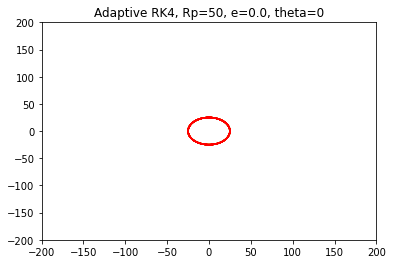

In [18]:
import matplotlib.pyplot as plt
t= np.linspace(-math.pi,math.pi,100000)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Adaptive RK4, Rp="+str(rad0)+", e="+str(ecc0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0/2,t,1),hyperbfns.getytheory(theta0,ecc0,rad0/2,t,1),'b')
plt.plot(hyperbfns.getxtheory(theta0,ecc0,rad0/2,t,-1),hyperbfns.getytheory(theta0,ecc0,rad0/2,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

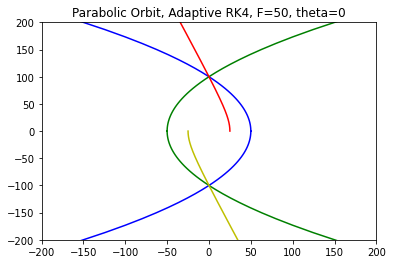

In [56]:
import matplotlib.pyplot as plt
t= np.linspace(0,2*math.pi,100)
xax=-200+np.arange(0,400)
plt.ylim(-200,200)
plt.xlim(-200,200)
plt.title("Parabolic Orbit, Adaptive RK4, F="+str(rad0)+", theta="+str(round(180*theta0/math.pi)))
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,1),parabfns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(parabfns.getxtheory(theta0,ecc0,rad0,t,-1),parabfns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'r')
plt.show()

Adaptive RK4 orbits run and superficially look correct. 

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2
oneellipse=int(len(npdt))
plt.ylim(-200,200)
plt.xlim(-200,200)
#plt.ylim(-1,1)
#plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-1,1)
plt.xlim(74.999,75)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
#plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:oneellipse,0],npstar1x[:oneellipse,1],'*y')
plt.plot(npstar2x[:oneellipse,0],npstar2x[:oneellipse,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
import matplotlib.pyplot as plt
t = np.linspace(0, 2*math.pi, 100)
xax=np.arange(0,100*len(npstar2x[:,1]))
xax=xax-len(xax)/2

#plt.ylim(-200,200)
#plt.xlim(-200,200)
plt.ylim(-10,10)
plt.xlim(-25,-20)
plt.title("Elliptical Orbit, RK4, a="+str(rad0)+", e="+ str(ecc0)+", theta="+str(round(180*theta0/math.pi))+ " degrees")
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,1),ellipsefns.getytheory(theta0,ecc0,rad0,t,1),'b')
plt.plot(ellipsefns.getxtheory(theta0,ecc0,rad0,t,-1),ellipsefns.getytheory(theta0,ecc0,rad0,t,-1),'g')
plt.plot(npstar1x[:,0],npstar1x[:,1],'*y')
plt.plot(npstar2x[:,0],npstar2x[:,1],'*r')
plt.plot(xax, np.tan(theta0)*xax,'c')
plt.show()

In [ ]:
nperr

In [ ]:


plt.xlabel("timestep")
plt.ylabel("Rel err: 1/30 *|x2-x1|*(h'/h)^5")
plt.title("Relative error, RK4")
relerrplt,=plt.plot(np.arange(2,oneellipse),nperr[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))
plt.legend(handles=[relerrplt])
plt.show()

This curve should be constant and about equal to delta

In [ ]:


plt.xlabel("timestep number")
plt.ylabel("timestep size")
plt.title("Evolution of timestep with step")
relerrplt,=plt.plot(np.arange(2,oneellipse),npdt[2:oneellipse],'b',label=" dtmin = "+ str(dtmin)+" delta = "+str(delta))

plt.show()

For appropriately set tolerances, adaptive timestep no longer has feedback issues. Tol=delta=0.0005 or less. The important thing is that this curve is smooth and has no constant regions where the value is pinned to either the maximum or minimum. We also seek reasonable starting values for the timestep. 

In [ ]:
plt.xlabel("x")
plt.ylabel("relative error")
plt.title("horizontal position vs relative error")
plt.plot(npstar1x[2:oneellipse,0], nperr[2:oneellipse],'b')
plt.show()

In [ ]:
plt.xlabel("y")
plt.ylabel("rel error")
plt.title("y vs rel error")
plt.plot(npstar1x[2:oneellipse,1],nperr[2:oneellipse])
plt.show()

In [ ]:
plt.xlabel("r")
plt.ylabel("rel error")
plt.title("r vs rel error")
rstar1x=np.sqrt(npstar1x[:,0]**2+npstar1x[:,1]**2)
plt.plot(rstar1x[2:oneellipse],nperr[2:oneellipse],'*b')
plt.show()

In [ ]:
plt.xlabel("t")
plt.ylabel("r")
plt.title("r vs t")
plt.plot(nptimes[2:oneellipse], rstar1x[2:oneellipse], '*b')
plt.show()

In [ ]:
thetaellipse = np.arctan2(npstar1x[2:oneellipse,1],npstar1x[2:oneellipse,0])

In [ ]:
plt.xlabel("t")
plt.ylabel("theta")
plt.title("theta vs t")
plt.plot(nptimes[2:oneellipse],thetaellipse,'b')
plt.show()

In [ ]:
plt.xlabel("theta")
plt.ylabel("rel error")
plt.title("rel error vs theta")
plt.plot(thetaellipse, nperr[2:oneellipse],'*b')
plt.show()


# Conservation of angular momentum

In [ ]:
import Lstability

In [ ]:
deltaL, Lavg=Lstability.Lstability(npstar1x,npstar2x,mass0)
deltaL, Lavg

In [ ]:
deltaL*Lavg

Orbit conserves angular momentum to a tolerance of deltaL. 

# Conservation of Energy

In [ ]:
import Estability

In [ ]:
deltaE, Eavg = Estability.Estability(npstar1x, npstar2x, mass0)
deltaE, Eavg

In [ ]:
deltaE*Eavg

Orbit conserves energy to a relative error of deltaE. 

# Symmetry of the two stars orbits with respect to eachother 

In [ ]:
import orbitSymmetricTol

In [ ]:
allcancelsx, allcancelsa=orbitSymmetricTol.howSymmetric(npstar1x,npstar2x,npstar1a,npstar2a)

In [ ]:
allcancelsx

Orbit is symmetric with respect to x and v up to a tolerance of allcancelsx

In [ ]:
allcancelsa

In [ ]:
npstar1x

Orbit is symmetric with respect to a to up to or better than a tolerance of allcancelsa

# Testing for precision in perihelion and aphelion recovery from knowledge of the initial angle

In [ ]:
import aeTest

In [ ]:
from matplotlib import pyplot as plt
plt.plot( np.abs(npstar1x[:,1]))

In [ ]:
def findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion):
    maxindex=len(npstar1x[:,1])
    apindex=np.argmin(np.abs(npstar1x[10:int(maxindex/2),1]))+1
    print(apindex)
    delta=math.floor(.2*apindex)
    print(delta)
    perindex=np.argmin(np.abs(npstar1x[delta:apindex-delta,1]))+delta
    print(perindex)
    print(apindex/perindex)
    if np.abs(apindex/perindex-2.)>0.05: 
        perindex=np.argmin(np.abs(npstar1x[apindex+delta:2*apindex+delta,1]))+delta+apindex
        print(perindex)
        apindex,perindex=perindex,apindex
        print(apindex,perindex)
        print(apindex/perindex)
    #apindex3=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    #apindex4=np.argmin(np.abs(npstar1x[100:apindex3-100,1]))+100
    #perindex=np.argmin(np.abs(npstar1x[100:apindex2-100,1]))+100
    if useperihelion:
        apindex,perindex=perindex,apindex
    coordap=[npstar1x[apindex,0],npstar1x[apindex,1]]
    coordper=[npstar1x[perindex,0],npstar1x[perindex,1]]
    ra=np.sqrt(np.sum(np.array(coordap)**2))
    rp=np.sqrt(np.sum(np.array(coordper)**2))
    e=(ra-rp)/(ra+rp)
    a=1./2.*(ra+rp)
    deltae=np.abs(e-ecc0)/ecc0
    deltaa=np.abs(a-rad0)/rad0
    return apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
if theta0==0:
    apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa=findPerapHelionThetaIsZero(npstar1x,ecc0,rad0,useperihelion)

In [ ]:
if theta0!=0:
    perindex,apindex,coordper,coordap,rp,ra,e,a,deltae,deltaa=aeTest.findPerApHelion(npstar1x,theta0,ecc0,rad0)

Recovered perihelion radius given by r_per, recovered aphelion radius given by r_ap, a is semimajor axis computed from the orbit, e is eccentricty computed from the orbit, delta a is relative error on the semimajor axis, and delta e is eccenticity relative error. 

In [ ]:
apindex,perindex,coordap,coordper,ra,rp,e,a,deltae,deltaa

In [ ]:
plt.plot(nptimes[:perindex],npstar1x[:perindex,1])

# Fit t as a function of the eccentric anomoly (angle from the center of the elipse)

In [ ]:
def findEccentricAnomoly(coordap, coordper):
    Ecenter=np.array(coordap)+np.array(coordper)
    Ecenter/=2.
    return Ecenter


In [ ]:
ellipsecenter=findEccentricAnomoly(coordap,coordper)

In [ ]:
ellipsecenter

In [ ]:
def getEllipsecenter(ecc,rad,theta, useperihelion):
    #ind of use perihelion
    rp=rad*(1-ecc)
    ra=-rad*(1+ecc)
    rcent=(rp+ra)/2
    #print(rp,ra,rcent)
    rcentx=rcent*np.cos(theta)
    rcenty=rcent* np.sin(theta)
    return [rcentx,rcenty]

In [ ]:
(np.array(coordap)+np.array(coordper))/2

In [ ]:
getEllipsecenter(ecc0,rad0,theta0, True)

In [ ]:
np.arctan2(-1.,0)/math.pi*180

In [ ]:
def getEang(npstar2x,ecc,rad,theta, useperihelion):
    ellipsecenter=getEllipsecenter(ecc,rad,theta, useperihelion)
    #print(ellipsecenter)
    #print(npstar1x)
    #print(npstar1x[:,0])
    xfortan=npstar2x[:,0]-ellipsecenter[0]
    yfortan=npstar2x[:,1]-ellipsecenter[1]
    #print("xy",xfortan,yfortan)
    Eang=np.arctan2(yfortan,xfortan)
    Eangtheta=2*np.arctan2(np.sqrt(1-ecc)*np.sin(theta/2.),np.sqrt(1+ecc)*np.cos(theta/2.))
    Eang-=Eangtheta
    #if useperihelion:
    #    Eang-=math.pi
    print(len(Eang))
    for i in np.arange(len(Eang)):
        #if xfortan[i]<0:
        #    Eang[i]+=math.pi
        if Eang[i]<0:
            Eang[i]+=2*math.pi
    print(xfortan,yfortan,Eang/math.pi*180)
    print("Eang",Eang)
    return xfortan, yfortan,Eang

In [ ]:
np.arctan2(-6.69327422*10**-6, -0.02240526)

In [ ]:
def xofeccanom(rad,Eang,ecc):
    return rad*(np.cos(Eang)+ecc)

In [ ]:
def yofeccanom(rad, Eang, ecc):
    b=getsemiminor(rad,ecc)
    return b*np.sin(Eang) 

In [ ]:
def tofEccAnom(npstar2x, rad,ecc,theta,mass, useperihelion):
    xE0,yE0,Eang=getEang(npstar2x,ecc,rad,theta, useperihelion)
    b=getsemiminor(rad,ecc)
    #fitval=rad*b*(Eang-ecc*np.sin(Eang))
    sgn=-1
    if useperihelion:
        sgn*=-1
    # added a factor of 2 in front of fitval
    fitval=rad**(1.5)*mass**(-.5)*(Eang-sgn*ecc*np.sin(Eang))
    fitval*=2
    print(Eang, ecc,rad,mass,fitval)
    return fitval

In [ ]:
def residualtEang(pars,nptimes,npstar2x):
    residual=np.abs(nptimes-tofEccAnom(npstar2x,pars['rad'],pars['ecc'],pars['theta'],pars['mass'],pars['useperihelion']))
    #print(nptimes, residual)
    return residual

In [ ]:
endindex=apindex
if useperihelion:
    endindex=perindex

In [ ]:
endindex

In [ ]:
xE0,yE0,Eang0=getEang(npstar2x[0:endindex-1,:],ecc0,rad0,theta0, useperihelion)

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
plt.plot(Eang0, xE0)

In [ ]:
plt.plot(Eang0, yE0)

In [ ]:
plt.plot(xE0,yE0)

In [ ]:
plt.plot(nptimesoneorbit,xE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0)

In [ ]:
plt.plot(nptimesoneorbit,yE0/xE0)

In [ ]:
np.arctan(0./1.)

In [ ]:
yE0[0]

In [ ]:
xE0[0]

In [ ]:
plt.plot(nptimesoneorbit,np.arctan2(yE0,xE0)*180/math.pi)

In [ ]:
Eangtest=tofEccAnom(npstar2x[0:endindex-1,:],rad0,ecc0,theta0,masses[0], useperihelion)

In [ ]:
np.max(Eangtest)

In [ ]:
nptimes[0]

In [ ]:
nptimesoneorbit=nptimes[0:endindex-1]

In [ ]:
tpredoneorbit=Eangtest[0:endindex-1]

In [ ]:
Eangoneorbit=Eang0[0:endindex-1]

In [ ]:
plt.plot(nptimesoneorbit,npstar2x[0:endindex-1,1])

In [ ]:
plt.plot(nptimesoneorbit,Eangoneorbit/math.pi*180)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit)

In [ ]:
plt.plot(nptimesoneorbit,tpredoneorbit, label='times')
plt.xlabel("T timesteps")
plt.ylabel("T computed from angle")
plt.title("Times using start parameters")
plt.show()
plt.plot(nptimesoneorbit,tpredoneorbit-nptimesoneorbit, label='residual')
plt.legend()
plt.show()


In [ ]:
from matplotlib import pyplot as plt

In [ ]:
plt.scatter(nptimesoneorbit,tpredoneorbit)

In [ ]:
from lmfit import Minimizer,Parameters
pfittEang = Parameters()
pfittEang.add(name='theta', value=theta0, min=theta0-math.pi, max=theta0+math.pi, vary=True)
pfittEang.add(name='rad', value=rad0, min=0, vary=True)
pfittEang.add(name='ecc', value=ecc0, min=0, max=1.0, vary=True)
pfittEang.add(name='mass', value=masses[0], vary=False)
pfittEang.add(name='useperihelion', value=True, vary=False)

minit = Minimizer(residualtEang, pfittEang, fcn_args=(nptimesoneorbit,npstar2x[:endindex-1,:]))

outt = minit.leastsq()

In [ ]:
outt

Semimajor axis fit is good to about .1 percent at an eccentricity of 0.5. rad=49.886512 for delta=0.0001. rad=49.8863857 for delta = 0.0005. ecc = 0.51764747 for delta = 0.0001. ecc = 0.51765166 for delta = 0.0005. so both ecc and rad improve with a smaller delta, but not quickly. The program runs very slowly for large delta and requires 500000 timesteps for delta=0.0001. 

In [ ]:
tfinal=nptimesoneorbit[endindex-2]
tfinal

In [ ]:
from scipy.fft import fft

In [ ]:
from scipy.signal import blackman
wndow=blackman(len(nptimesoneorbit))

In [ ]:
ftresiduals=fft(nptimesoneorbit-tpredoneorbit)

In [ ]:
xf = np.linspace(0.0, 1.0/(2.0*dt), len(nptimesoneorbit)//2)

In [ ]:
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:len(nptimesoneorbit)//2]), '-b')

In [ ]:
ftr=fft(np.sqrt(npstar1x[:endindex-1,0]**2+npstar1x[:endindex-1,1]**2))

In [ ]:
plt.xlabel("frequency")
plt.ylabel("Fourier transform of t(E)")
plt.title("Fourier transform of time computed from eccentric anomaly")
plt.semilogy(xf[1:len(nptimesoneorbit)//2], 2.0/len(nptimesoneorbit) * np.abs(ftr[1:len(nptimesoneorbit)//2]), '-b')

This is the fourier transform of the triangle wave.

In [ ]:
plt.title("Fourier transform of residuals of times")
plt.xlabel("frequency")
plt.ylabel("FT(t(E))")
plt.semilogy(xf[1:50], 2.0/len(nptimesoneorbit) * np.abs(ftresiduals[1:50]), '-b')

In [ ]:
plt.xlabel("bin number")
plt.ylabel("FT(t(E))")
plt.title("Fourier transform of residuals of times")
plt.semilogy(np.arange(1,30), 2.0/len(nptimesoneorbit[:29]) * np.abs(ftresiduals[1:30]), '*b')

Peak at the second harmonic and the sixth harmonic. The second harmonic seems natural due to the symmetry of the orbit but the sixth harmonic is harder to explain. 

Implementing the Adaptive RK4 hasn't changed the fit, residuals, or harmonics, sadly. There is still a 2% error in the fit for an eccentricity of 0.5